During one of my school projects me and my teammates needed to download some pdf files in order
to get data to create an Ai based solution.

This notebook is an automation for scrapping pdf files from the "https://www.ons.dz/" website
and text extraction from these pdf files

# Part I: Web scrapping

In [ ]:
# for get the pdf files or url
import requests

# for tree traversal scraping in webpage
from bs4 import BeautifulSoup

The scrap function is reponsible for return a beautiful soup object (it parses the html file)
in order to be able to manipulate it to extact the desired data

The code is adapted from geeks for geeks https://www.geeksforgeeks.org/how-to-scrape-websites-with-beautifulsoup-and-python/

In [ ]:
def scrap(url):

    # get the url from requests get method
    read = requests.get(url, verify=False)#I changed it to false cuz Algerian websites don't have an SSL certificate

    # full html content 
    html_content = read.content

    # Parse the html content 
    soup = BeautifulSoup(html_content, "html.parser")
    return soup

In [98]:
main_page = scrap("https://www.ons.dz/spip.php?rubrique124")
print(main_page)

c:\anaconda3\envs\TS_ENV\Lib\site-packages\urllib3\connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.ons.dz'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


<!DOCTYPE html PUBLIC "-//W3C//DTD XHTML 1.0 Transitional//EN" "http://www.w3.org/TR/xhtml1/DTD/xhtml1-transitional.dtd">

<html dir="ltr" lang="fr" xml:lang="fr" xmlns="http://www.w3.org/1999/xhtml">
<head>
<meta content="text/html; charset=utf-8" http-equiv="Content-Type"/>
<meta content="IE=edge" http-equiv="X-UA-Compatible"/>
<title>ONS : Office National des Statistiques</title>
<link href="css/menui.css" rel="stylesheet" type="text/css"/>
<link href="style-2.css" rel="stylesheet" type="text/css"/>
<style type="text/css">
<!--
.bordure_bas {border-bottom: 1px dotted #CCCCCC;
}
-->
.hover{background:#FFF0E1;}
.hover a{color:#008040;font-weight: bold;}	
.hover a:hover{color:#008040	;font-weight: bold;}
</style>
<script src="ddaccordion.js" type="text/javascript">
</script>
<script src="jquery.js" type="text/javascript"></script>
<script>
ddaccordion.init({
	headerclass: "technology", //Shared CSS class name of headers group
	contentclass: "thelanguage", //Shared CSS class name of con

After analysing the output we notice that for each month of the year between 1996 and 2025,
the link that takes us to the pdf file is nested within a div un an anchor element with href
that starts with "spip.php?article" then the id of the article

Since our goal is to download all the pdf files we need to collect all the links of the pdf files
to send html request and get them afterwards

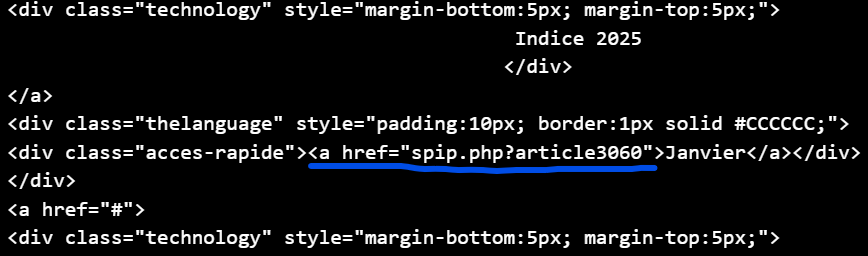

In [99]:
target_div_list = main_page.find_all("div")
pdf_links = set()
if target_div_list:
    print(len(target_div_list))
    # Find all <a> elements inside the div
    for target_div in target_div_list:
        pdf_link = [a["href"] for a in target_div.find_all("a", href=True) if "spip.php?article"  in a["href"]]
        #print(pdf_links)
        if pdf_link:
            pdf_links.update(pdf_link)
    print(len(pdf_links))
else:

    print("no pdf links !")

447
347


In [109]:
print(list(pdf_links)[0])
print(scrap("https://www.ons.dz/" + list(pdf_links)[0]))

spip.php?article2148


c:\anaconda3\envs\TS_ENV\Lib\site-packages\urllib3\connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.ons.dz'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


<!DOCTYPE html PUBLIC "-//W3C//DTD XHTML 1.0 Transitional//EN" "http://www.w3.org/TR/xhtml1/DTD/xhtml1-transitional.dtd">

<html dir="ltr" lang="fr" xml:lang="fr" xmlns="http://www.w3.org/1999/xhtml">
<head>
<meta content="text/html; charset=utf-8" http-equiv="Content-Type"/>
<meta content="IE=edge" http-equiv="X-UA-Compatible"/>
<title>ONS : Office National des Statistiques</title>
<link href="css/menui.css" rel="stylesheet" type="text/css"/>
<link href="style-2.css" rel="stylesheet" type="text/css"/>
<style type="text/css">
<!--
.bordure_bas {border-bottom: 1px dotted #CCCCCC;
}
-->
.hover{background:#FFF0E1;}
.hover a{color:#008040;font-weight: bold;}	
.hover a:hover{color:#008040	;font-weight: bold;}
</style>
<script type="text/javascript">/* <![CDATA[ */
var box_settings = {tt_img:true,sel_g:"#documents_portfolio a[type='image/jpeg'],#documents_portfolio a[type='image/png'],#documents_portfolio a[type='image/gif']",sel_c:".mediabox",trans:"elastic",speed:"200",ssSpeed:"2500",maxW:

We analyse the output again:

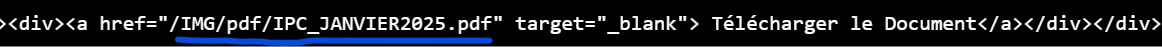

We notice that the desired pdf files links are within anchor elements that are nested inside divs.
The href of the anchor elements contains "/IMG/pdf/" in it (or IMG/pdf/ without the / in some cases
that's why we'll be using string without the / because it will work for all the pages)

So we used the previously obtained set (we use the set data structure to handle the duplicates in an efficient way)
and we iterate to get the desired pdf files links

In [107]:
all_pdf_files = set()

for link in pdf_links:
    link = "https://www.ons.dz/" + link
    scrapped_pdf_link = scrap(link)
    print("link:\t",link)
    target_div_list = scrapped_pdf_link.find_all("div")
    if target_div_list:
        for target_div in target_div_list:
        
            pdf_file = [a["href"] for a in target_div.find_all("a", href=True) if "IMG/pdf/"  in a["href"]]
            #print(pdf_file)
            if pdf_file:
                print("file:\t",pdf_file,"added")
                all_pdf_files.update(pdf_file)
        #print(len(all_pdf_files))
        #print(all_pdf_files)
    else:
        print("no pdf links !")

c:\anaconda3\envs\TS_ENV\Lib\site-packages\urllib3\connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.ons.dz'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


link:	 https://www.ons.dz/spip.php?article2148
file:	 ['IMG/pdf/ipc062018.pdf'] added
file:	 ['IMG/pdf/ipc062018.pdf'] added


c:\anaconda3\envs\TS_ENV\Lib\site-packages\urllib3\connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.ons.dz'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


link:	 https://www.ons.dz/spip.php?article745


c:\anaconda3\envs\TS_ENV\Lib\site-packages\urllib3\connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.ons.dz'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


link:	 https://www.ons.dz/spip.php?article796


c:\anaconda3\envs\TS_ENV\Lib\site-packages\urllib3\connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.ons.dz'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


link:	 https://www.ons.dz/spip.php?article823


c:\anaconda3\envs\TS_ENV\Lib\site-packages\urllib3\connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.ons.dz'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


link:	 https://www.ons.dz/spip.php?article2206
file:	 ['IMG/pdf/ipc102018.pdf'] added
file:	 ['IMG/pdf/ipc102018.pdf'] added


c:\anaconda3\envs\TS_ENV\Lib\site-packages\urllib3\connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.ons.dz'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


link:	 https://www.ons.dz/spip.php?article809


c:\anaconda3\envs\TS_ENV\Lib\site-packages\urllib3\connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.ons.dz'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


link:	 https://www.ons.dz/spip.php?article2682
file:	 ['IMG/pdf/i.ipc_fevrier2021.pdf'] added
file:	 ['IMG/pdf/i.ipc_fevrier2021.pdf'] added


c:\anaconda3\envs\TS_ENV\Lib\site-packages\urllib3\connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.ons.dz'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


link:	 https://www.ons.dz/spip.php?article778


c:\anaconda3\envs\TS_ENV\Lib\site-packages\urllib3\connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.ons.dz'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


link:	 https://www.ons.dz/spip.php?article1995
file:	 ['IMG/pdf/ipc022017.pdf'] added
file:	 ['IMG/pdf/ipc022017.pdf'] added


c:\anaconda3\envs\TS_ENV\Lib\site-packages\urllib3\connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.ons.dz'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


link:	 https://www.ons.dz/spip.php?article820


c:\anaconda3\envs\TS_ENV\Lib\site-packages\urllib3\connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.ons.dz'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


link:	 https://www.ons.dz/spip.php?article849


c:\anaconda3\envs\TS_ENV\Lib\site-packages\urllib3\connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.ons.dz'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


link:	 https://www.ons.dz/spip.php?article2047
file:	 ['IMG/pdf/ipc072017.pdf'] added
file:	 ['IMG/pdf/ipc072017.pdf'] added


c:\anaconda3\envs\TS_ENV\Lib\site-packages\urllib3\connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.ons.dz'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


link:	 https://www.ons.dz/spip.php?article2455
file:	 ['IMG/pdf/i.ipc_decembre2019.pdf'] added
file:	 ['IMG/pdf/i.ipc_decembre2019.pdf'] added


c:\anaconda3\envs\TS_ENV\Lib\site-packages\urllib3\connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.ons.dz'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


link:	 https://www.ons.dz/spip.php?article1864
file:	 ['IMG/pdf/Ipc0416.pdf'] added
file:	 ['IMG/pdf/Ipc0416.pdf'] added


c:\anaconda3\envs\TS_ENV\Lib\site-packages\urllib3\connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.ons.dz'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


link:	 https://www.ons.dz/spip.php?article1432
file:	 ['IMG/pdf/Ipc0214_-2.pdf'] added
file:	 ['IMG/pdf/Ipc0214_-2.pdf'] added


c:\anaconda3\envs\TS_ENV\Lib\site-packages\urllib3\connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.ons.dz'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


link:	 https://www.ons.dz/spip.php?article1930
file:	 ['IMG/pdf/Ipc1016.pdf'] added
file:	 ['IMG/pdf/Ipc1016.pdf'] added


c:\anaconda3\envs\TS_ENV\Lib\site-packages\urllib3\connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.ons.dz'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


link:	 https://www.ons.dz/spip.php?article2955
file:	 ['/IMG/pdf/I.IPC_Octobre2023.pdf'] added
file:	 ['/IMG/pdf/I.IPC_Octobre2023.pdf'] added
file:	 ['/IMG/pdf/I.IPC_Octobre2023.pdf'] added
file:	 ['/IMG/pdf/I.IPC_Octobre2023.pdf'] added


c:\anaconda3\envs\TS_ENV\Lib\site-packages\urllib3\connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.ons.dz'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


link:	 https://www.ons.dz/spip.php?article935
file:	 ['IMG/pdf/IPC0110_NB.pdf'] added
file:	 ['IMG/pdf/IPC0110_NB.pdf'] added


c:\anaconda3\envs\TS_ENV\Lib\site-packages\urllib3\connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.ons.dz'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


link:	 https://www.ons.dz/spip.php?article860
file:	 ['IMG/pdf/ipc0203-2.pdf'] added
file:	 ['IMG/pdf/ipc0203-2.pdf'] added


c:\anaconda3\envs\TS_ENV\Lib\site-packages\urllib3\connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.ons.dz'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


link:	 https://www.ons.dz/spip.php?article2834
file:	 ['/IMG/pdf/i.ipc_octobre2022.pdf'] added
file:	 ['/IMG/pdf/i.ipc_octobre2022.pdf'] added
file:	 ['/IMG/pdf/i.ipc_octobre2022.pdf'] added
file:	 ['/IMG/pdf/i.ipc_octobre2022.pdf'] added


c:\anaconda3\envs\TS_ENV\Lib\site-packages\urllib3\connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.ons.dz'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


link:	 https://www.ons.dz/spip.php?article2745
file:	 ['IMG/pdf/i.ipc_octobre2021.pdf'] added
file:	 ['IMG/pdf/i.ipc_octobre2021.pdf'] added


c:\anaconda3\envs\TS_ENV\Lib\site-packages\urllib3\connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.ons.dz'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


link:	 https://www.ons.dz/spip.php?article801


c:\anaconda3\envs\TS_ENV\Lib\site-packages\urllib3\connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.ons.dz'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


link:	 https://www.ons.dz/spip.php?article724
file:	 ['IMG/pdf/IPC1109-2.pdf'] added
file:	 ['IMG/pdf/IPC1109-2.pdf'] added


c:\anaconda3\envs\TS_ENV\Lib\site-packages\urllib3\connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.ons.dz'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


link:	 https://www.ons.dz/spip.php?article1122
file:	 ['IMG/pdf/Ipc0412-2.pdf'] added
file:	 ['IMG/pdf/Ipc0412-2.pdf'] added


c:\anaconda3\envs\TS_ENV\Lib\site-packages\urllib3\connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.ons.dz'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


link:	 https://www.ons.dz/spip.php?article750


c:\anaconda3\envs\TS_ENV\Lib\site-packages\urllib3\connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.ons.dz'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


link:	 https://www.ons.dz/spip.php?article1867
file:	 ['IMG/pdf/ipc0516.pdf'] added
file:	 ['IMG/pdf/ipc0516.pdf'] added


c:\anaconda3\envs\TS_ENV\Lib\site-packages\urllib3\connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.ons.dz'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


link:	 https://www.ons.dz/spip.php?article1456
file:	 ['IMG/pdf/Ipc0514_-2.pdf'] added
file:	 ['IMG/pdf/Ipc0514_-2.pdf'] added


c:\anaconda3\envs\TS_ENV\Lib\site-packages\urllib3\connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.ons.dz'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


link:	 https://www.ons.dz/spip.php?article1543
file:	 ['IMG/pdf/IPC_1214-2.pdf'] added
file:	 ['IMG/pdf/IPC_1214-2.pdf'] added


c:\anaconda3\envs\TS_ENV\Lib\site-packages\urllib3\connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.ons.dz'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


link:	 https://www.ons.dz/spip.php?article732


c:\anaconda3\envs\TS_ENV\Lib\site-packages\urllib3\connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.ons.dz'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


link:	 https://www.ons.dz/spip.php?article751


c:\anaconda3\envs\TS_ENV\Lib\site-packages\urllib3\connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.ons.dz'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


link:	 https://www.ons.dz/spip.php?article2381
file:	 ['IMG/pdf/ipcsept2019.pdf'] added
file:	 ['IMG/pdf/ipcsept2019.pdf'] added


c:\anaconda3\envs\TS_ENV\Lib\site-packages\urllib3\connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.ons.dz'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


link:	 https://www.ons.dz/spip.php?article803


c:\anaconda3\envs\TS_ENV\Lib\site-packages\urllib3\connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.ons.dz'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


link:	 https://www.ons.dz/spip.php?article2531
file:	 ['IMG/pdf/i.ipc_fevrier2020.pdf'] added
file:	 ['IMG/pdf/i.ipc_fevrier2020.pdf'] added


c:\anaconda3\envs\TS_ENV\Lib\site-packages\urllib3\connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.ons.dz'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


link:	 https://www.ons.dz/spip.php?article1822
file:	 ['IMG/pdf/Ipc0216-2.pdf'] added
file:	 ['IMG/pdf/Ipc0216-2.pdf'] added


c:\anaconda3\envs\TS_ENV\Lib\site-packages\urllib3\connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.ons.dz'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


link:	 https://www.ons.dz/spip.php?article828


c:\anaconda3\envs\TS_ENV\Lib\site-packages\urllib3\connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.ons.dz'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


link:	 https://www.ons.dz/spip.php?article752


c:\anaconda3\envs\TS_ENV\Lib\site-packages\urllib3\connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.ons.dz'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


link:	 https://www.ons.dz/spip.php?article3021
file:	 ['/IMG/pdf/I.IPC_septembre2024.pdf'] added
file:	 ['/IMG/pdf/I.IPC_septembre2024.pdf'] added
file:	 ['/IMG/pdf/I.IPC_septembre2024.pdf'] added
file:	 ['/IMG/pdf/I.IPC_septembre2024.pdf'] added


c:\anaconda3\envs\TS_ENV\Lib\site-packages\urllib3\connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.ons.dz'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


link:	 https://www.ons.dz/spip.php?article2683
file:	 ['IMG/pdf/i.ipc_mars2021.pdf'] added
file:	 ['IMG/pdf/i.ipc_mars2021.pdf'] added


c:\anaconda3\envs\TS_ENV\Lib\site-packages\urllib3\connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.ons.dz'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


link:	 https://www.ons.dz/spip.php?article867
file:	 ['IMG/pdf/ipc0903-2.pdf'] added
file:	 ['IMG/pdf/ipc0903-2.pdf'] added


c:\anaconda3\envs\TS_ENV\Lib\site-packages\urllib3\connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.ons.dz'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


link:	 https://www.ons.dz/spip.php?article1857
file:	 ['IMG/pdf/Ipc0316.pdf'] added
file:	 ['IMG/pdf/Ipc0316.pdf'] added


c:\anaconda3\envs\TS_ENV\Lib\site-packages\urllib3\connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.ons.dz'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


link:	 https://www.ons.dz/spip.php?article1879
file:	 ['IMG/pdf/ipc0716.pdf'] added
file:	 ['IMG/pdf/ipc0716.pdf'] added


c:\anaconda3\envs\TS_ENV\Lib\site-packages\urllib3\connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.ons.dz'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


link:	 https://www.ons.dz/spip.php?article811


c:\anaconda3\envs\TS_ENV\Lib\site-packages\urllib3\connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.ons.dz'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


link:	 https://www.ons.dz/spip.php?article845
file:	 ['IMG/pdf/ipc1104-2.pdf'] added
file:	 ['IMG/pdf/ipc1104-2.pdf'] added


c:\anaconda3\envs\TS_ENV\Lib\site-packages\urllib3\connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.ons.dz'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


link:	 https://www.ons.dz/spip.php?article772


c:\anaconda3\envs\TS_ENV\Lib\site-packages\urllib3\connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.ons.dz'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


link:	 https://www.ons.dz/spip.php?article800


c:\anaconda3\envs\TS_ENV\Lib\site-packages\urllib3\connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.ons.dz'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


link:	 https://www.ons.dz/spip.php?article2326
file:	 ['IMG/pdf/ipc042019.pdf'] added
file:	 ['IMG/pdf/ipc042019.pdf'] added


c:\anaconda3\envs\TS_ENV\Lib\site-packages\urllib3\connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.ons.dz'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


link:	 https://www.ons.dz/spip.php?article2621
file:	 ['IMG/pdf/i.ipc_octobre2020.pdf'] added
file:	 ['IMG/pdf/i.ipc_octobre2020.pdf'] added


c:\anaconda3\envs\TS_ENV\Lib\site-packages\urllib3\connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.ons.dz'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


link:	 https://www.ons.dz/spip.php?article844
file:	 ['IMG/pdf/ipc1004-2.pdf'] added
file:	 ['IMG/pdf/ipc1004-2.pdf'] added


c:\anaconda3\envs\TS_ENV\Lib\site-packages\urllib3\connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.ons.dz'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


link:	 https://www.ons.dz/spip.php?article868
file:	 ['IMG/pdf/ipc1003-2.pdf'] added
file:	 ['IMG/pdf/ipc1003-2.pdf'] added


c:\anaconda3\envs\TS_ENV\Lib\site-packages\urllib3\connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.ons.dz'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


link:	 https://www.ons.dz/spip.php?article1499
file:	 ['IMG/pdf/Ipc0814.pdf'] added
file:	 ['IMG/pdf/Ipc0814.pdf'] added


c:\anaconda3\envs\TS_ENV\Lib\site-packages\urllib3\connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.ons.dz'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


link:	 https://www.ons.dz/spip.php?article2902
file:	 ['/IMG/pdf/i.IPC022023.pdf'] added
file:	 ['/IMG/pdf/i.IPC022023.pdf'] added
file:	 ['/IMG/pdf/i.IPC022023.pdf'] added
file:	 ['/IMG/pdf/i.IPC022023.pdf'] added


c:\anaconda3\envs\TS_ENV\Lib\site-packages\urllib3\connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.ons.dz'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


link:	 https://www.ons.dz/spip.php?article2970
file:	 ['/IMG/pdf/I.IPC_Janvier2024.pdf'] added
file:	 ['/IMG/pdf/I.IPC_Janvier2024.pdf'] added
file:	 ['/IMG/pdf/I.IPC_Janvier2024.pdf'] added
file:	 ['/IMG/pdf/I.IPC_Janvier2024.pdf'] added


c:\anaconda3\envs\TS_ENV\Lib\site-packages\urllib3\connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.ons.dz'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


link:	 https://www.ons.dz/spip.php?article843
file:	 ['IMG/pdf/ipc0904-2.pdf'] added
file:	 ['IMG/pdf/ipc0904-2.pdf'] added


c:\anaconda3\envs\TS_ENV\Lib\site-packages\urllib3\connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.ons.dz'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


link:	 https://www.ons.dz/spip.php?article1301
file:	 ['IMG/pdf/Ipc1113-2.pdf'] added
file:	 ['IMG/pdf/Ipc1113-2.pdf'] added


c:\anaconda3\envs\TS_ENV\Lib\site-packages\urllib3\connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.ons.dz'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


link:	 https://www.ons.dz/spip.php?article1130
file:	 ['IMG/pdf/Ipc0512-2.pdf'] added
file:	 ['IMG/pdf/Ipc0512-2.pdf'] added


c:\anaconda3\envs\TS_ENV\Lib\site-packages\urllib3\connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.ons.dz'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


link:	 https://www.ons.dz/spip.php?article851


c:\anaconda3\envs\TS_ENV\Lib\site-packages\urllib3\connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.ons.dz'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


link:	 https://www.ons.dz/spip.php?article2770
file:	 ['IMG/pdf/i.ipc.decembre2021.pdf'] added
file:	 ['IMG/pdf/i.ipc.decembre2021.pdf'] added


c:\anaconda3\envs\TS_ENV\Lib\site-packages\urllib3\connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.ons.dz'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


link:	 https://www.ons.dz/spip.php?article1783
file:	 ['IMG/pdf/Ipc1215-2.pdf'] added
file:	 ['IMG/pdf/Ipc1215-2.pdf'] added


c:\anaconda3\envs\TS_ENV\Lib\site-packages\urllib3\connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.ons.dz'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


link:	 https://www.ons.dz/spip.php?article792


c:\anaconda3\envs\TS_ENV\Lib\site-packages\urllib3\connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.ons.dz'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


link:	 https://www.ons.dz/spip.php?article861
file:	 ['IMG/pdf/ipc0303-2.pdf'] added
file:	 ['IMG/pdf/ipc0303-2.pdf'] added


c:\anaconda3\envs\TS_ENV\Lib\site-packages\urllib3\connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.ons.dz'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


link:	 https://www.ons.dz/spip.php?article1354
file:	 ['IMG/pdf/Ipc1213_2_-2.pdf'] added
file:	 ['IMG/pdf/Ipc1213_2_-2.pdf'] added


c:\anaconda3\envs\TS_ENV\Lib\site-packages\urllib3\connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.ons.dz'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


link:	 https://www.ons.dz/spip.php?article793


c:\anaconda3\envs\TS_ENV\Lib\site-packages\urllib3\connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.ons.dz'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


link:	 https://www.ons.dz/spip.php?article2135
file:	 ['IMG/pdf/ipc052018.pdf'] added
file:	 ['IMG/pdf/ipc052018.pdf'] added


c:\anaconda3\envs\TS_ENV\Lib\site-packages\urllib3\connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.ons.dz'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


link:	 https://www.ons.dz/spip.php?article2549
file:	 ['IMG/pdf/i.ipc_mai2020.pdf'] added
file:	 ['IMG/pdf/i.ipc_mai2020.pdf'] added


c:\anaconda3\envs\TS_ENV\Lib\site-packages\urllib3\connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.ons.dz'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


link:	 https://www.ons.dz/spip.php?article2742
file:	 ['IMG/pdf/i.ipc_juillet2021.pdf'] added
file:	 ['IMG/pdf/i.ipc_juillet2021.pdf'] added


c:\anaconda3\envs\TS_ENV\Lib\site-packages\urllib3\connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.ons.dz'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


link:	 https://www.ons.dz/spip.php?article876


c:\anaconda3\envs\TS_ENV\Lib\site-packages\urllib3\connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.ons.dz'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


link:	 https://www.ons.dz/spip.php?article2048
file:	 ['IMG/pdf/ipc082017.pdf'] added
file:	 ['IMG/pdf/ipc082017.pdf'] added


c:\anaconda3\envs\TS_ENV\Lib\site-packages\urllib3\connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.ons.dz'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


link:	 https://www.ons.dz/spip.php?article848


c:\anaconda3\envs\TS_ENV\Lib\site-packages\urllib3\connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.ons.dz'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


link:	 https://www.ons.dz/spip.php?article878


c:\anaconda3\envs\TS_ENV\Lib\site-packages\urllib3\connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.ons.dz'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


link:	 https://www.ons.dz/spip.php?article737


c:\anaconda3\envs\TS_ENV\Lib\site-packages\urllib3\connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.ons.dz'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


link:	 https://www.ons.dz/spip.php?article768


c:\anaconda3\envs\TS_ENV\Lib\site-packages\urllib3\connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.ons.dz'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


link:	 https://www.ons.dz/spip.php?article785


c:\anaconda3\envs\TS_ENV\Lib\site-packages\urllib3\connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.ons.dz'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


link:	 https://www.ons.dz/spip.php?article2996
file:	 ['/IMG/pdf/I.IPC_mai2024.pdf'] added
file:	 ['/IMG/pdf/I.IPC_mai2024.pdf'] added
file:	 ['/IMG/pdf/I.IPC_mai2024.pdf'] added
file:	 ['/IMG/pdf/I.IPC_mai2024.pdf'] added


c:\anaconda3\envs\TS_ENV\Lib\site-packages\urllib3\connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.ons.dz'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


link:	 https://www.ons.dz/spip.php?article1982
file:	 ['IMG/pdf/ipc012017.pdf'] added
file:	 ['IMG/pdf/ipc012017.pdf'] added


c:\anaconda3\envs\TS_ENV\Lib\site-packages\urllib3\connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.ons.dz'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


link:	 https://www.ons.dz/spip.php?article881


c:\anaconda3\envs\TS_ENV\Lib\site-packages\urllib3\connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.ons.dz'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


link:	 https://www.ons.dz/spip.php?article873


c:\anaconda3\envs\TS_ENV\Lib\site-packages\urllib3\connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.ons.dz'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


link:	 https://www.ons.dz/spip.php?article807


c:\anaconda3\envs\TS_ENV\Lib\site-packages\urllib3\connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.ons.dz'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


link:	 https://www.ons.dz/spip.php?article2994
file:	 ['/IMG/pdf/I.IPC_Avril2024.pdf'] added
file:	 ['/IMG/pdf/I.IPC_Avril2024.pdf'] added
file:	 ['/IMG/pdf/I.IPC_Avril2024.pdf'] added
file:	 ['/IMG/pdf/I.IPC_Avril2024.pdf'] added


c:\anaconda3\envs\TS_ENV\Lib\site-packages\urllib3\connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.ons.dz'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


link:	 https://www.ons.dz/spip.php?article846
file:	 ['IMG/pdf/ipc1204-2.pdf'] added
file:	 ['IMG/pdf/ipc1204-2.pdf'] added


c:\anaconda3\envs\TS_ENV\Lib\site-packages\urllib3\connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.ons.dz'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


link:	 https://www.ons.dz/spip.php?article942
file:	 ['IMG/pdf/IPC0810.pdf'] added
file:	 ['IMG/pdf/IPC0810.pdf'] added


c:\anaconda3\envs\TS_ENV\Lib\site-packages\urllib3\connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.ons.dz'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


link:	 https://www.ons.dz/spip.php?article815


c:\anaconda3\envs\TS_ENV\Lib\site-packages\urllib3\connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.ons.dz'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


link:	 https://www.ons.dz/spip.php?article3005
file:	 ['/IMG/pdf/I.IPC_Juin2024.pdf'] added
file:	 ['/IMG/pdf/I.IPC_Juin2024.pdf'] added
file:	 ['/IMG/pdf/I.IPC_Juin2024.pdf'] added
file:	 ['/IMG/pdf/I.IPC_Juin2024.pdf'] added


c:\anaconda3\envs\TS_ENV\Lib\site-packages\urllib3\connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.ons.dz'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


link:	 https://www.ons.dz/spip.php?article819


c:\anaconda3\envs\TS_ENV\Lib\site-packages\urllib3\connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.ons.dz'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


link:	 https://www.ons.dz/spip.php?article2772
file:	 ['IMG/pdf/i.ipc_fevrier2022.pdf'] added
file:	 ['IMG/pdf/i.ipc_fevrier2022.pdf'] added


c:\anaconda3\envs\TS_ENV\Lib\site-packages\urllib3\connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.ons.dz'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


link:	 https://www.ons.dz/spip.php?article842
file:	 ['IMG/pdf/ipc0804-2.pdf'] added
file:	 ['IMG/pdf/ipc0804-2.pdf'] added


c:\anaconda3\envs\TS_ENV\Lib\site-packages\urllib3\connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.ons.dz'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


link:	 https://www.ons.dz/spip.php?article1153
file:	 ['IMG/pdf/Ipc1012-2.pdf'] added
file:	 ['IMG/pdf/Ipc1012-2.pdf'] added


c:\anaconda3\envs\TS_ENV\Lib\site-packages\urllib3\connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.ons.dz'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


link:	 https://www.ons.dz/spip.php?article1172
file:	 ['IMG/pdf/Ipc0113-2.pdf'] added
file:	 ['IMG/pdf/Ipc0113-2.pdf'] added


c:\anaconda3\envs\TS_ENV\Lib\site-packages\urllib3\connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.ons.dz'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


link:	 https://www.ons.dz/spip.php?article841
file:	 ['IMG/pdf/ipc0704-2.pdf'] added
file:	 ['IMG/pdf/ipc0704-2.pdf'] added


c:\anaconda3\envs\TS_ENV\Lib\site-packages\urllib3\connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.ons.dz'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


link:	 https://www.ons.dz/spip.php?article2067
file:	 ['IMG/pdf/ipc102017.pdf'] added
file:	 ['IMG/pdf/ipc102017.pdf'] added


c:\anaconda3\envs\TS_ENV\Lib\site-packages\urllib3\connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.ons.dz'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


link:	 https://www.ons.dz/spip.php?article2905
file:	 ['/IMG/pdf/i.IPC_Mars2023.pdf'] added
file:	 ['/IMG/pdf/i.IPC_Mars2023.pdf'] added
file:	 ['/IMG/pdf/i.IPC_Mars2023.pdf'] added
file:	 ['/IMG/pdf/i.IPC_Mars2023.pdf'] added


c:\anaconda3\envs\TS_ENV\Lib\site-packages\urllib3\connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.ons.dz'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


link:	 https://www.ons.dz/spip.php?article1391
file:	 ['IMG/pdf/Ipc0114-2.pdf'] added
file:	 ['IMG/pdf/Ipc0114-2.pdf'] added


c:\anaconda3\envs\TS_ENV\Lib\site-packages\urllib3\connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.ons.dz'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


link:	 https://www.ons.dz/spip.php?article739


c:\anaconda3\envs\TS_ENV\Lib\site-packages\urllib3\connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.ons.dz'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


link:	 https://www.ons.dz/spip.php?article871


c:\anaconda3\envs\TS_ENV\Lib\site-packages\urllib3\connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.ons.dz'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


link:	 https://www.ons.dz/spip.php?article1091
file:	 ['IMG/pdf/Ipc0711.pdf'] added
file:	 ['IMG/pdf/Ipc0711.pdf'] added


c:\anaconda3\envs\TS_ENV\Lib\site-packages\urllib3\connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.ons.dz'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


link:	 https://www.ons.dz/spip.php?article2987
file:	 ['/IMG/pdf/I.IPC_mars2024.pdf'] added
file:	 ['/IMG/pdf/I.IPC_mars2024.pdf'] added
file:	 ['/IMG/pdf/I.IPC_mars2024.pdf'] added
file:	 ['/IMG/pdf/I.IPC_mars2024.pdf'] added


c:\anaconda3\envs\TS_ENV\Lib\site-packages\urllib3\connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.ons.dz'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


link:	 https://www.ons.dz/spip.php?article1649
file:	 ['IMG/pdf/Ipc0415-2.pdf'] added
file:	 ['IMG/pdf/Ipc0415-2.pdf'] added


c:\anaconda3\envs\TS_ENV\Lib\site-packages\urllib3\connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.ons.dz'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


link:	 https://www.ons.dz/spip.php?article753


c:\anaconda3\envs\TS_ENV\Lib\site-packages\urllib3\connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.ons.dz'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


link:	 https://www.ons.dz/spip.php?article864
file:	 ['IMG/pdf/ipc0603-2.pdf'] added
file:	 ['IMG/pdf/ipc0603-2.pdf'] added


c:\anaconda3\envs\TS_ENV\Lib\site-packages\urllib3\connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.ons.dz'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


link:	 https://www.ons.dz/spip.php?article2306
file:	 ['IMG/pdf/ipc012019.pdf'] added
file:	 ['IMG/pdf/ipc012019.pdf'] added


c:\anaconda3\envs\TS_ENV\Lib\site-packages\urllib3\connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.ons.dz'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


link:	 https://www.ons.dz/spip.php?article756


c:\anaconda3\envs\TS_ENV\Lib\site-packages\urllib3\connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.ons.dz'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


link:	 https://www.ons.dz/spip.php?article720
file:	 ['IMG/pdf/IPC0709.pdf'] added
file:	 ['IMG/pdf/IPC0709.pdf'] added


c:\anaconda3\envs\TS_ENV\Lib\site-packages\urllib3\connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.ons.dz'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


link:	 https://www.ons.dz/spip.php?article838
file:	 ['IMG/pdf/ipc0404-2.pdf'] added
file:	 ['IMG/pdf/ipc0404-2.pdf'] added


c:\anaconda3\envs\TS_ENV\Lib\site-packages\urllib3\connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.ons.dz'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


link:	 https://www.ons.dz/spip.php?article731


c:\anaconda3\envs\TS_ENV\Lib\site-packages\urllib3\connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.ons.dz'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


link:	 https://www.ons.dz/spip.php?article2744
file:	 ['IMG/pdf/i.ipc_septembre_2021.pdf'] added
file:	 ['IMG/pdf/i.ipc_septembre_2021.pdf'] added


c:\anaconda3\envs\TS_ENV\Lib\site-packages\urllib3\connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.ons.dz'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


link:	 https://www.ons.dz/spip.php?article767


c:\anaconda3\envs\TS_ENV\Lib\site-packages\urllib3\connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.ons.dz'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


link:	 https://www.ons.dz/spip.php?article1290
file:	 ['IMG/pdf/Ipc1013-2.pdf'] added
file:	 ['IMG/pdf/Ipc1013-2.pdf'] added


c:\anaconda3\envs\TS_ENV\Lib\site-packages\urllib3\connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.ons.dz'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


link:	 https://www.ons.dz/spip.php?article2413
file:	 ['IMG/pdf/ipc_novembre2019.pdf'] added
file:	 ['IMG/pdf/ipc_novembre2019.pdf'] added


c:\anaconda3\envs\TS_ENV\Lib\site-packages\urllib3\connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.ons.dz'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


link:	 https://www.ons.dz/spip.php?article980
file:	 ['IMG/pdf/Ipc0111.pdf'] added
file:	 ['IMG/pdf/Ipc0111.pdf'] added


c:\anaconda3\envs\TS_ENV\Lib\site-packages\urllib3\connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.ons.dz'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


link:	 https://www.ons.dz/spip.php?article747


c:\anaconda3\envs\TS_ENV\Lib\site-packages\urllib3\connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.ons.dz'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


link:	 https://www.ons.dz/spip.php?article829


c:\anaconda3\envs\TS_ENV\Lib\site-packages\urllib3\connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.ons.dz'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


link:	 https://www.ons.dz/spip.php?article789


c:\anaconda3\envs\TS_ENV\Lib\site-packages\urllib3\connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.ons.dz'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


link:	 https://www.ons.dz/spip.php?article2743
file:	 ['IMG/pdf/i.ipc_aout2021.pdf'] added
file:	 ['IMG/pdf/i.ipc_aout2021.pdf'] added


c:\anaconda3\envs\TS_ENV\Lib\site-packages\urllib3\connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.ons.dz'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


link:	 https://www.ons.dz/spip.php?article2919
file:	 ['/IMG/pdf/I.IPC052023.pdf'] added
file:	 ['/IMG/pdf/I.IPC052023.pdf'] added
file:	 ['/IMG/pdf/I.IPC052023.pdf'] added
file:	 ['/IMG/pdf/I.IPC052023.pdf'] added


c:\anaconda3\envs\TS_ENV\Lib\site-packages\urllib3\connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.ons.dz'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


link:	 https://www.ons.dz/spip.php?article1878
file:	 ['IMG/pdf/Ipc_juin2016.pdf'] added
file:	 ['IMG/pdf/Ipc_juin2016.pdf'] added


c:\anaconda3\envs\TS_ENV\Lib\site-packages\urllib3\connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.ons.dz'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


link:	 https://www.ons.dz/spip.php?article806


c:\anaconda3\envs\TS_ENV\Lib\site-packages\urllib3\connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.ons.dz'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


link:	 https://www.ons.dz/spip.php?article2344
file:	 ['IMG/pdf/ipcjuin2019-3.pdf'] added
file:	 ['IMG/pdf/ipcjuin2019-3.pdf'] added


c:\anaconda3\envs\TS_ENV\Lib\site-packages\urllib3\connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.ons.dz'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


link:	 https://www.ons.dz/spip.php?article743


c:\anaconda3\envs\TS_ENV\Lib\site-packages\urllib3\connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.ons.dz'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


link:	 https://www.ons.dz/spip.php?article730


c:\anaconda3\envs\TS_ENV\Lib\site-packages\urllib3\connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.ons.dz'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


link:	 https://www.ons.dz/spip.php?article2943
file:	 ['/IMG/pdf/I.IPC_Septembre2023.pdf'] added
file:	 ['/IMG/pdf/I.IPC_Septembre2023.pdf'] added
file:	 ['/IMG/pdf/I.IPC_Septembre2023.pdf'] added
file:	 ['/IMG/pdf/I.IPC_Septembre2023.pdf'] added


c:\anaconda3\envs\TS_ENV\Lib\site-packages\urllib3\connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.ons.dz'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


link:	 https://www.ons.dz/spip.php?article2321
file:	 ['IMG/pdf/ipc032019.pdf'] added
file:	 ['IMG/pdf/ipc032019.pdf'] added


c:\anaconda3\envs\TS_ENV\Lib\site-packages\urllib3\connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.ons.dz'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


link:	 https://www.ons.dz/spip.php?article1175
file:	 ['IMG/pdf/Ipc0313-2.pdf'] added
file:	 ['IMG/pdf/Ipc0313-2.pdf'] added


c:\anaconda3\envs\TS_ENV\Lib\site-packages\urllib3\connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.ons.dz'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


link:	 https://www.ons.dz/spip.php?article764


c:\anaconda3\envs\TS_ENV\Lib\site-packages\urllib3\connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.ons.dz'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


link:	 https://www.ons.dz/spip.php?article766


c:\anaconda3\envs\TS_ENV\Lib\site-packages\urllib3\connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.ons.dz'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


link:	 https://www.ons.dz/spip.php?article1254
file:	 ['IMG/pdf/Ipc0713-2.pdf'] added
file:	 ['IMG/pdf/Ipc0713-2.pdf'] added


c:\anaconda3\envs\TS_ENV\Lib\site-packages\urllib3\connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.ons.dz'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


link:	 https://www.ons.dz/spip.php?article734


c:\anaconda3\envs\TS_ENV\Lib\site-packages\urllib3\connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.ons.dz'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


link:	 https://www.ons.dz/spip.php?article855


c:\anaconda3\envs\TS_ENV\Lib\site-packages\urllib3\connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.ons.dz'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


link:	 https://www.ons.dz/spip.php?article880


c:\anaconda3\envs\TS_ENV\Lib\site-packages\urllib3\connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.ons.dz'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


link:	 https://www.ons.dz/spip.php?article1204
file:	 ['IMG/pdf/Ipc0613.pdf'] added
file:	 ['IMG/pdf/Ipc0613.pdf'] added


c:\anaconda3\envs\TS_ENV\Lib\site-packages\urllib3\connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.ons.dz'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


link:	 https://www.ons.dz/spip.php?article769


c:\anaconda3\envs\TS_ENV\Lib\site-packages\urllib3\connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.ons.dz'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


link:	 https://www.ons.dz/spip.php?article2540
file:	 ['IMG/pdf/i.ipc_mars2020.pdf'] added
file:	 ['IMG/pdf/i.ipc_mars2020.pdf'] added


c:\anaconda3\envs\TS_ENV\Lib\site-packages\urllib3\connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.ons.dz'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


link:	 https://www.ons.dz/spip.php?article728


c:\anaconda3\envs\TS_ENV\Lib\site-packages\urllib3\connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.ons.dz'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


link:	 https://www.ons.dz/spip.php?article856


c:\anaconda3\envs\TS_ENV\Lib\site-packages\urllib3\connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.ons.dz'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


link:	 https://www.ons.dz/spip.php?article2639
file:	 ['IMG/pdf/i.ipc_janvier2021.pdf'] added
file:	 ['IMG/pdf/i.ipc_janvier2021.pdf'] added


c:\anaconda3\envs\TS_ENV\Lib\site-packages\urllib3\connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.ons.dz'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


link:	 https://www.ons.dz/spip.php?article2935
file:	 ['/IMG/pdf/I.IPC_juillet2023.pdf'] added
file:	 ['/IMG/pdf/I.IPC_juillet2023.pdf'] added
file:	 ['/IMG/pdf/I.IPC_juillet2023.pdf'] added
file:	 ['/IMG/pdf/I.IPC_juillet2023.pdf'] added


c:\anaconda3\envs\TS_ENV\Lib\site-packages\urllib3\connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.ons.dz'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


link:	 https://www.ons.dz/spip.php?article810


c:\anaconda3\envs\TS_ENV\Lib\site-packages\urllib3\connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.ons.dz'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


link:	 https://www.ons.dz/spip.php?article988
file:	 ['IMG/pdf/Ipc0311.pdf'] added
file:	 ['IMG/pdf/Ipc0311.pdf'] added


c:\anaconda3\envs\TS_ENV\Lib\site-packages\urllib3\connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.ons.dz'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


link:	 https://www.ons.dz/spip.php?article715
file:	 ['IMG/pdf/IPC0209.pdf'] added
file:	 ['IMG/pdf/IPC0209.pdf'] added


c:\anaconda3\envs\TS_ENV\Lib\site-packages\urllib3\connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.ons.dz'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


link:	 https://www.ons.dz/spip.php?article717
file:	 ['IMG/pdf/IPC0409.pdf'] added
file:	 ['IMG/pdf/IPC0409.pdf'] added


c:\anaconda3\envs\TS_ENV\Lib\site-packages\urllib3\connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.ons.dz'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


link:	 https://www.ons.dz/spip.php?article798


c:\anaconda3\envs\TS_ENV\Lib\site-packages\urllib3\connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.ons.dz'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


link:	 https://www.ons.dz/spip.php?article2801
file:	 ['IMG/pdf/i.ipc_mai_2022.pdf'] added
file:	 ['IMG/pdf/i.ipc_mai_2022.pdf'] added


c:\anaconda3\envs\TS_ENV\Lib\site-packages\urllib3\connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.ons.dz'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


link:	 https://www.ons.dz/spip.php?article2927
file:	 ['/IMG/pdf/I.IPC_juin2023.pdf'] added
file:	 ['/IMG/pdf/I.IPC_juin2023.pdf'] added
file:	 ['/IMG/pdf/I.IPC_juin2023.pdf'] added
file:	 ['/IMG/pdf/I.IPC_juin2023.pdf'] added


c:\anaconda3\envs\TS_ENV\Lib\site-packages\urllib3\connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.ons.dz'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


link:	 https://www.ons.dz/spip.php?article2632
file:	 ['IMG/pdf/i.ipc_decembre2020.pdf'] added
file:	 ['IMG/pdf/i.ipc_decembre2020.pdf'] added


c:\anaconda3\envs\TS_ENV\Lib\site-packages\urllib3\connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.ons.dz'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


link:	 https://www.ons.dz/spip.php?article770


c:\anaconda3\envs\TS_ENV\Lib\site-packages\urllib3\connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.ons.dz'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


link:	 https://www.ons.dz/spip.php?article818


c:\anaconda3\envs\TS_ENV\Lib\site-packages\urllib3\connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.ons.dz'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


link:	 https://www.ons.dz/spip.php?article729


c:\anaconda3\envs\TS_ENV\Lib\site-packages\urllib3\connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.ons.dz'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


link:	 https://www.ons.dz/spip.php?article759


c:\anaconda3\envs\TS_ENV\Lib\site-packages\urllib3\connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.ons.dz'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


link:	 https://www.ons.dz/spip.php?article721
file:	 ['IMG/pdf/IPC0809nouvb.pdf'] added
file:	 ['IMG/pdf/IPC0809nouvb.pdf'] added


c:\anaconda3\envs\TS_ENV\Lib\site-packages\urllib3\connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.ons.dz'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


link:	 https://www.ons.dz/spip.php?article870
file:	 ['IMG/pdf/ipc1203-2.pdf'] added
file:	 ['IMG/pdf/ipc1203-2.pdf'] added


c:\anaconda3\envs\TS_ENV\Lib\site-packages\urllib3\connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.ons.dz'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


link:	 https://www.ons.dz/spip.php?article780


c:\anaconda3\envs\TS_ENV\Lib\site-packages\urllib3\connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.ons.dz'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


link:	 https://www.ons.dz/spip.php?article2012
file:	 ['IMG/pdf/ipc0517.pdf'] added
file:	 ['IMG/pdf/ipc0517.pdf'] added


c:\anaconda3\envs\TS_ENV\Lib\site-packages\urllib3\connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.ons.dz'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


link:	 https://www.ons.dz/spip.php?article1092
file:	 ['IMG/pdf/Ipc0811.pdf'] added
file:	 ['IMG/pdf/Ipc0811.pdf'] added


c:\anaconda3\envs\TS_ENV\Lib\site-packages\urllib3\connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.ons.dz'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


link:	 https://www.ons.dz/spip.php?article790


c:\anaconda3\envs\TS_ENV\Lib\site-packages\urllib3\connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.ons.dz'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


link:	 https://www.ons.dz/spip.php?article2154
file:	 ['IMG/pdf/ipc072018.pdf'] added
file:	 ['IMG/pdf/ipc072018.pdf'] added


c:\anaconda3\envs\TS_ENV\Lib\site-packages\urllib3\connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.ons.dz'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


link:	 https://www.ons.dz/spip.php?article2911
file:	 ['/IMG/pdf/I.IPC_Avril2023.pdf'] added
file:	 ['/IMG/pdf/I.IPC_Avril2023.pdf'] added
file:	 ['/IMG/pdf/I.IPC_Avril2023.pdf'] added
file:	 ['/IMG/pdf/I.IPC_Avril2023.pdf'] added


c:\anaconda3\envs\TS_ENV\Lib\site-packages\urllib3\connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.ons.dz'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


link:	 https://www.ons.dz/spip.php?article1093
file:	 ['IMG/pdf/Ipc0911.pdf'] added
file:	 ['IMG/pdf/Ipc0911.pdf'] added


c:\anaconda3\envs\TS_ENV\Lib\site-packages\urllib3\connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.ons.dz'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


link:	 https://www.ons.dz/spip.php?article3010
file:	 ['/IMG/pdf/I.IPC_Juillet2024.pdf'] added
file:	 ['/IMG/pdf/I.IPC_Juillet2024.pdf'] added
file:	 ['/IMG/pdf/I.IPC_Juillet2024.pdf'] added
file:	 ['/IMG/pdf/I.IPC_Juillet2024.pdf'] added


c:\anaconda3\envs\TS_ENV\Lib\site-packages\urllib3\connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.ons.dz'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


link:	 https://www.ons.dz/spip.php?article1098
file:	 ['IMG/pdf/Ipc0212-2.pdf'] added
file:	 ['IMG/pdf/Ipc0212-2.pdf'] added


c:\anaconda3\envs\TS_ENV\Lib\site-packages\urllib3\connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.ons.dz'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


link:	 https://www.ons.dz/spip.php?article813


c:\anaconda3\envs\TS_ENV\Lib\site-packages\urllib3\connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.ons.dz'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


link:	 https://www.ons.dz/spip.php?article782


c:\anaconda3\envs\TS_ENV\Lib\site-packages\urllib3\connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.ons.dz'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


link:	 https://www.ons.dz/spip.php?article3034
file:	 ['/IMG/pdf/i.ipc_Novembre2024.pdf'] added
file:	 ['/IMG/pdf/i.ipc_Novembre2024.pdf'] added
file:	 ['/IMG/pdf/i.ipc_Novembre2024.pdf'] added
file:	 ['/IMG/pdf/i.ipc_Novembre2024.pdf'] added


c:\anaconda3\envs\TS_ENV\Lib\site-packages\urllib3\connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.ons.dz'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


link:	 https://www.ons.dz/spip.php?article937
file:	 ['IMG/pdf/IPC0310.pdf'] added
file:	 ['IMG/pdf/IPC0310.pdf'] added


c:\anaconda3\envs\TS_ENV\Lib\site-packages\urllib3\connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.ons.dz'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


link:	 https://www.ons.dz/spip.php?article869
file:	 ['IMG/pdf/ipc1103-2.pdf'] added
file:	 ['IMG/pdf/ipc1103-2.pdf'] added


c:\anaconda3\envs\TS_ENV\Lib\site-packages\urllib3\connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.ons.dz'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


link:	 https://www.ons.dz/spip.php?article857


c:\anaconda3\envs\TS_ENV\Lib\site-packages\urllib3\connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.ons.dz'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


link:	 https://www.ons.dz/spip.php?article714
file:	 ['IMG/pdf/IPC0109.pdf'] added
file:	 ['IMG/pdf/IPC0109.pdf'] added


c:\anaconda3\envs\TS_ENV\Lib\site-packages\urllib3\connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.ons.dz'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


link:	 https://www.ons.dz/spip.php?article1534
file:	 ['IMG/pdf/Ipc1114_-2.pdf'] added
file:	 ['IMG/pdf/Ipc1114_-2.pdf'] added


c:\anaconda3\envs\TS_ENV\Lib\site-packages\urllib3\connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.ons.dz'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


link:	 https://www.ons.dz/spip.php?article808


c:\anaconda3\envs\TS_ENV\Lib\site-packages\urllib3\connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.ons.dz'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


link:	 https://www.ons.dz/spip.php?article840
file:	 ['IMG/pdf/ipc0604-2.pdf'] added
file:	 ['IMG/pdf/ipc0604-2.pdf'] added


c:\anaconda3\envs\TS_ENV\Lib\site-packages\urllib3\connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.ons.dz'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


link:	 https://www.ons.dz/spip.php?article992
file:	 ['IMG/pdf/Ipc0411-2.pdf'] added
file:	 ['IMG/pdf/Ipc0411-2.pdf'] added


c:\anaconda3\envs\TS_ENV\Lib\site-packages\urllib3\connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.ons.dz'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


link:	 https://www.ons.dz/spip.php?article757


c:\anaconda3\envs\TS_ENV\Lib\site-packages\urllib3\connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.ons.dz'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


link:	 https://www.ons.dz/spip.php?article725
file:	 ['IMG/pdf/IPC1209.pdf'] added
file:	 ['IMG/pdf/IPC1209.pdf'] added


c:\anaconda3\envs\TS_ENV\Lib\site-packages\urllib3\connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.ons.dz'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


link:	 https://www.ons.dz/spip.php?article874


c:\anaconda3\envs\TS_ENV\Lib\site-packages\urllib3\connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.ons.dz'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


link:	 https://www.ons.dz/spip.php?article822


c:\anaconda3\envs\TS_ENV\Lib\site-packages\urllib3\connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.ons.dz'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


link:	 https://www.ons.dz/spip.php?article1741
file:	 ['IMG/pdf/Ipc0915_.pdf'] added
file:	 ['IMG/pdf/Ipc0915_.pdf'] added


c:\anaconda3\envs\TS_ENV\Lib\site-packages\urllib3\connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.ons.dz'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


link:	 https://www.ons.dz/spip.php?article948
file:	 ['IMG/pdf/IPC1010.pdf'] added
file:	 ['IMG/pdf/IPC1010.pdf'] added


c:\anaconda3\envs\TS_ENV\Lib\site-packages\urllib3\connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.ons.dz'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


link:	 https://www.ons.dz/spip.php?article758


c:\anaconda3\envs\TS_ENV\Lib\site-packages\urllib3\connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.ons.dz'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


link:	 https://www.ons.dz/spip.php?article1975
file:	 ['IMG/pdf/Ipc1216.pdf'] added
file:	 ['IMG/pdf/Ipc1216.pdf'] added


c:\anaconda3\envs\TS_ENV\Lib\site-packages\urllib3\connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.ons.dz'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


link:	 https://www.ons.dz/spip.php?article1532
file:	 ['IMG/pdf/Ipc1014-2.pdf'] added
file:	 ['IMG/pdf/Ipc1014-2.pdf'] added


c:\anaconda3\envs\TS_ENV\Lib\site-packages\urllib3\connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.ons.dz'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


link:	 https://www.ons.dz/spip.php?article2843
file:	 ['/IMG/pdf/i.ipc_novembre2022.pdf'] added
file:	 ['/IMG/pdf/i.ipc_novembre2022.pdf'] added
file:	 ['/IMG/pdf/i.ipc_novembre2022.pdf'] added
file:	 ['/IMG/pdf/i.ipc_novembre2022.pdf'] added


c:\anaconda3\envs\TS_ENV\Lib\site-packages\urllib3\connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.ons.dz'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


link:	 https://www.ons.dz/spip.php?article777


c:\anaconda3\envs\TS_ENV\Lib\site-packages\urllib3\connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.ons.dz'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


link:	 https://www.ons.dz/spip.php?article2939
file:	 ['/IMG/pdf/ipc_Aout2023.pdf'] added
file:	 ['/IMG/pdf/ipc_Aout2023.pdf'] added
file:	 ['/IMG/pdf/ipc_Aout2023.pdf'] added
file:	 ['/IMG/pdf/ipc_Aout2023.pdf'] added


c:\anaconda3\envs\TS_ENV\Lib\site-packages\urllib3\connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.ons.dz'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


link:	 https://www.ons.dz/spip.php?article786


c:\anaconda3\envs\TS_ENV\Lib\site-packages\urllib3\connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.ons.dz'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


link:	 https://www.ons.dz/spip.php?article3031
file:	 ['/IMG/pdf/i.ipc_octobre2024.pdf'] added
file:	 ['/IMG/pdf/i.ipc_octobre2024.pdf'] added
file:	 ['/IMG/pdf/i.ipc_octobre2024.pdf'] added
file:	 ['/IMG/pdf/i.ipc_octobre2024.pdf'] added


c:\anaconda3\envs\TS_ENV\Lib\site-packages\urllib3\connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.ons.dz'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


link:	 https://www.ons.dz/spip.php?article742


c:\anaconda3\envs\TS_ENV\Lib\site-packages\urllib3\connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.ons.dz'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


link:	 https://www.ons.dz/spip.php?article2758
file:	 ['IMG/pdf/i.ipc_novembre_2021.pdf'] added
file:	 ['IMG/pdf/i.ipc_novembre_2021.pdf'] added


c:\anaconda3\envs\TS_ENV\Lib\site-packages\urllib3\connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.ons.dz'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


link:	 https://www.ons.dz/spip.php?article1147
file:	 ['IMG/pdf/Ipc0912-2.pdf'] added
file:	 ['IMG/pdf/Ipc0912-2.pdf'] added


c:\anaconda3\envs\TS_ENV\Lib\site-packages\urllib3\connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.ons.dz'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


link:	 https://www.ons.dz/spip.php?article2061
file:	 ['IMG/pdf/ipc092017.pdf'] added
file:	 ['IMG/pdf/ipc092017.pdf'] added


c:\anaconda3\envs\TS_ENV\Lib\site-packages\urllib3\connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.ons.dz'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


link:	 https://www.ons.dz/spip.php?article2822
file:	 ['/IMG/pdf/I.IPC-Aout2022.pdf'] added
file:	 ['/IMG/pdf/I.IPC-Aout2022.pdf'] added
file:	 ['/IMG/pdf/I.IPC-Aout2022.pdf'] added
file:	 ['/IMG/pdf/I.IPC-Aout2022.pdf'] added


c:\anaconda3\envs\TS_ENV\Lib\site-packages\urllib3\connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.ons.dz'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


link:	 https://www.ons.dz/spip.php?article1684
file:	 ['IMG/pdf/Ipc0515-2.pdf'] added
file:	 ['IMG/pdf/Ipc0515-2.pdf'] added


c:\anaconda3\envs\TS_ENV\Lib\site-packages\urllib3\connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.ons.dz'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


link:	 https://www.ons.dz/spip.php?article862
file:	 ['IMG/pdf/ipc0403-2.pdf'] added
file:	 ['IMG/pdf/ipc0403-2.pdf'] added


c:\anaconda3\envs\TS_ENV\Lib\site-packages\urllib3\connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.ons.dz'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


link:	 https://www.ons.dz/spip.php?article2347
file:	 ['IMG/pdf/ipcaout2019.pdf'] added
file:	 ['IMG/pdf/ipcaout2019.pdf'] added


c:\anaconda3\envs\TS_ENV\Lib\site-packages\urllib3\connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.ons.dz'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


link:	 https://www.ons.dz/spip.php?article735


c:\anaconda3\envs\TS_ENV\Lib\site-packages\urllib3\connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.ons.dz'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


link:	 https://www.ons.dz/spip.php?article2072
file:	 ['IMG/pdf/ipc112017.pdf'] added
file:	 ['IMG/pdf/ipc112017.pdf'] added


c:\anaconda3\envs\TS_ENV\Lib\site-packages\urllib3\connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.ons.dz'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


link:	 https://www.ons.dz/spip.php?article1195
file:	 ['IMG/pdf/Ipc1212.pdf'] added
file:	 ['IMG/pdf/Ipc1212.pdf'] added


c:\anaconda3\envs\TS_ENV\Lib\site-packages\urllib3\connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.ons.dz'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


link:	 https://www.ons.dz/spip.php?article2004
file:	 ['IMG/pdf/ipcmars2017.pdf'] added
file:	 ['IMG/pdf/ipcmars2017.pdf'] added


c:\anaconda3\envs\TS_ENV\Lib\site-packages\urllib3\connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.ons.dz'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


link:	 https://www.ons.dz/spip.php?article773


c:\anaconda3\envs\TS_ENV\Lib\site-packages\urllib3\connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.ons.dz'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


link:	 https://www.ons.dz/spip.php?article2546
file:	 ['IMG/pdf/i.ipc_avril2020.pdf'] added
file:	 ['IMG/pdf/i.ipc_avril2020.pdf'] added


c:\anaconda3\envs\TS_ENV\Lib\site-packages\urllib3\connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.ons.dz'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


link:	 https://www.ons.dz/spip.php?article1102
file:	 ['IMG/pdf/Ipc0312-2.pdf'] added
file:	 ['IMG/pdf/Ipc0312-2.pdf'] added


c:\anaconda3\envs\TS_ENV\Lib\site-packages\urllib3\connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.ons.dz'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


link:	 https://www.ons.dz/spip.php?article1696
file:	 ['IMG/pdf/Ipc0615.pdf'] added
file:	 ['IMG/pdf/Ipc0615.pdf'] added


c:\anaconda3\envs\TS_ENV\Lib\site-packages\urllib3\connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.ons.dz'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


link:	 https://www.ons.dz/spip.php?article1200
file:	 ['IMG/pdf/Ipc0513-3.pdf'] added
file:	 ['IMG/pdf/Ipc0513-3.pdf'] added


c:\anaconda3\envs\TS_ENV\Lib\site-packages\urllib3\connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.ons.dz'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


link:	 https://www.ons.dz/spip.php?article740


c:\anaconda3\envs\TS_ENV\Lib\site-packages\urllib3\connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.ons.dz'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


link:	 https://www.ons.dz/spip.php?article837
file:	 ['IMG/pdf/ipc0304-2.pdf'] added
file:	 ['IMG/pdf/ipc0304-2.pdf'] added


c:\anaconda3\envs\TS_ENV\Lib\site-packages\urllib3\connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.ons.dz'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


link:	 https://www.ons.dz/spip.php?article1471
file:	 ['IMG/pdf/Ipc0714-2.pdf'] added
file:	 ['IMG/pdf/Ipc0714-2.pdf'] added


c:\anaconda3\envs\TS_ENV\Lib\site-packages\urllib3\connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.ons.dz'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


link:	 https://www.ons.dz/spip.php?article719
file:	 ['IMG/pdf/IPC0609.pdf'] added
file:	 ['IMG/pdf/IPC0609.pdf'] added


c:\anaconda3\envs\TS_ENV\Lib\site-packages\urllib3\connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.ons.dz'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


link:	 https://www.ons.dz/spip.php?article2252
file:	 ['IMG/pdf/ipc122018.pdf'] added
file:	 ['IMG/pdf/ipc122018.pdf'] added


c:\anaconda3\envs\TS_ENV\Lib\site-packages\urllib3\connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.ons.dz'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


link:	 https://www.ons.dz/spip.php?article1276
file:	 ['IMG/pdf/Ipc0813.pdf'] added
file:	 ['IMG/pdf/Ipc0813.pdf'] added


c:\anaconda3\envs\TS_ENV\Lib\site-packages\urllib3\connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.ons.dz'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


link:	 https://www.ons.dz/spip.php?article816


c:\anaconda3\envs\TS_ENV\Lib\site-packages\urllib3\connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.ons.dz'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


link:	 https://www.ons.dz/spip.php?article2191
file:	 ['IMG/pdf/ipc082018.pdf'] added
file:	 ['IMG/pdf/ipc082018.pdf'] added


c:\anaconda3\envs\TS_ENV\Lib\site-packages\urllib3\connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.ons.dz'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


link:	 https://www.ons.dz/spip.php?article2597
file:	 ['IMG/pdf/ipc-juin-2020.pdf'] added
file:	 ['IMG/pdf/ipc-juin-2020.pdf'] added


c:\anaconda3\envs\TS_ENV\Lib\site-packages\urllib3\connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.ons.dz'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


link:	 https://www.ons.dz/spip.php?article812


c:\anaconda3\envs\TS_ENV\Lib\site-packages\urllib3\connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.ons.dz'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


link:	 https://www.ons.dz/spip.php?article1894
file:	 ['IMG/pdf/Ipc0816.pdf'] added
file:	 ['IMG/pdf/Ipc0816.pdf'] added


c:\anaconda3\envs\TS_ENV\Lib\site-packages\urllib3\connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.ons.dz'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


link:	 https://www.ons.dz/spip.php?article1090
file:	 ['IMG/pdf/Ipc0611.pdf'] added
file:	 ['IMG/pdf/Ipc0611.pdf'] added


c:\anaconda3\envs\TS_ENV\Lib\site-packages\urllib3\connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.ons.dz'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


link:	 https://www.ons.dz/spip.php?article779


c:\anaconda3\envs\TS_ENV\Lib\site-packages\urllib3\connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.ons.dz'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


link:	 https://www.ons.dz/spip.php?article853


c:\anaconda3\envs\TS_ENV\Lib\site-packages\urllib3\connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.ons.dz'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


link:	 https://www.ons.dz/spip.php?article2794
file:	 ['IMG/pdf/i.ipc_mars2022.pdf'] added
file:	 ['IMG/pdf/i.ipc_mars2022.pdf'] added


c:\anaconda3\envs\TS_ENV\Lib\site-packages\urllib3\connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.ons.dz'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


link:	 https://www.ons.dz/spip.php?article826


c:\anaconda3\envs\TS_ENV\Lib\site-packages\urllib3\connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.ons.dz'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


link:	 https://www.ons.dz/spip.php?article744


c:\anaconda3\envs\TS_ENV\Lib\site-packages\urllib3\connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.ons.dz'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


link:	 https://www.ons.dz/spip.php?article875


c:\anaconda3\envs\TS_ENV\Lib\site-packages\urllib3\connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.ons.dz'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


link:	 https://www.ons.dz/spip.php?article2083
file:	 ['IMG/pdf/ipc122017.pdf'] added
file:	 ['IMG/pdf/ipc122017.pdf'] added


c:\anaconda3\envs\TS_ENV\Lib\site-packages\urllib3\connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.ons.dz'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


link:	 https://www.ons.dz/spip.php?article850


c:\anaconda3\envs\TS_ENV\Lib\site-packages\urllib3\connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.ons.dz'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


link:	 https://www.ons.dz/spip.php?article797


c:\anaconda3\envs\TS_ENV\Lib\site-packages\urllib3\connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.ons.dz'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


link:	 https://www.ons.dz/spip.php?article2962
file:	 ['/IMG/pdf/I.IPC_Decembre2023.pdf'] added
file:	 ['/IMG/pdf/I.IPC_Decembre2023.pdf'] added
file:	 ['/IMG/pdf/I.IPC_Decembre2023.pdf'] added
file:	 ['/IMG/pdf/I.IPC_Decembre2023.pdf'] added


c:\anaconda3\envs\TS_ENV\Lib\site-packages\urllib3\connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.ons.dz'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


link:	 https://www.ons.dz/spip.php?article2529
file:	 ['IMG/pdf/i.ipc_janvier2020.pdf'] added
file:	 ['IMG/pdf/i.ipc_janvier2020.pdf'] added


c:\anaconda3\envs\TS_ENV\Lib\site-packages\urllib3\connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.ons.dz'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


link:	 https://www.ons.dz/spip.php?article795


c:\anaconda3\envs\TS_ENV\Lib\site-packages\urllib3\connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.ons.dz'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


link:	 https://www.ons.dz/spip.php?article1174
file:	 ['IMG/pdf/Ipc0213f-2.pdf'] added
file:	 ['IMG/pdf/Ipc0213f-2.pdf'] added


c:\anaconda3\envs\TS_ENV\Lib\site-packages\urllib3\connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.ons.dz'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


link:	 https://www.ons.dz/spip.php?article863
file:	 ['IMG/pdf/ipc0503-2.pdf'] added
file:	 ['IMG/pdf/ipc0503-2.pdf'] added


c:\anaconda3\envs\TS_ENV\Lib\site-packages\urllib3\connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.ons.dz'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


link:	 https://www.ons.dz/spip.php?article791


c:\anaconda3\envs\TS_ENV\Lib\site-packages\urllib3\connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.ons.dz'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


link:	 https://www.ons.dz/spip.php?article1762
file:	 ['IMG/pdf/Ipc1115-2.pdf'] added
file:	 ['IMG/pdf/Ipc1115-2.pdf'] added


c:\anaconda3\envs\TS_ENV\Lib\site-packages\urllib3\connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.ons.dz'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


link:	 https://www.ons.dz/spip.php?article950
file:	 ['IMG/pdf/IPC0910-3.pdf'] added
file:	 ['IMG/pdf/IPC0910-3.pdf'] added


c:\anaconda3\envs\TS_ENV\Lib\site-packages\urllib3\connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.ons.dz'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


link:	 https://www.ons.dz/spip.php?article872


c:\anaconda3\envs\TS_ENV\Lib\site-packages\urllib3\connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.ons.dz'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


link:	 https://www.ons.dz/spip.php?article2098
file:	 ['IMG/pdf/ipc012018.pdf'] added
file:	 ['IMG/pdf/ipc012018.pdf'] added


c:\anaconda3\envs\TS_ENV\Lib\site-packages\urllib3\connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.ons.dz'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


link:	 https://www.ons.dz/spip.php?article2959
file:	 ['/IMG/pdf/I.IPC_novembre2023.pdf'] added
file:	 ['/IMG/pdf/I.IPC_novembre2023.pdf'] added
file:	 ['/IMG/pdf/I.IPC_novembre2023.pdf'] added
file:	 ['/IMG/pdf/I.IPC_novembre2023.pdf'] added


c:\anaconda3\envs\TS_ENV\Lib\site-packages\urllib3\connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.ons.dz'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


link:	 https://www.ons.dz/spip.php?article741


c:\anaconda3\envs\TS_ENV\Lib\site-packages\urllib3\connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.ons.dz'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


link:	 https://www.ons.dz/spip.php?article1089
file:	 ['IMG/pdf/Ipc0511-2.pdf'] added
file:	 ['IMG/pdf/Ipc0511-2.pdf'] added


c:\anaconda3\envs\TS_ENV\Lib\site-packages\urllib3\connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.ons.dz'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


link:	 https://www.ons.dz/spip.php?article738


c:\anaconda3\envs\TS_ENV\Lib\site-packages\urllib3\connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.ons.dz'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


link:	 https://www.ons.dz/spip.php?article761


c:\anaconda3\envs\TS_ENV\Lib\site-packages\urllib3\connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.ons.dz'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


link:	 https://www.ons.dz/spip.php?article1608
file:	 ['IMG/pdf/Ipc0215.pdf'] added
file:	 ['IMG/pdf/Ipc0215.pdf'] added


c:\anaconda3\envs\TS_ENV\Lib\site-packages\urllib3\connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.ons.dz'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


link:	 https://www.ons.dz/spip.php?article2410
file:	 ['IMG/pdf/ipcoctobre2019.pdf'] added
file:	 ['IMG/pdf/ipcoctobre2019.pdf'] added


c:\anaconda3\envs\TS_ENV\Lib\site-packages\urllib3\connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.ons.dz'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


link:	 https://www.ons.dz/spip.php?article754


c:\anaconda3\envs\TS_ENV\Lib\site-packages\urllib3\connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.ons.dz'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


link:	 https://www.ons.dz/spip.php?article987
file:	 ['IMG/pdf/Ipc0211.pdf'] added
file:	 ['IMG/pdf/Ipc0211.pdf'] added


c:\anaconda3\envs\TS_ENV\Lib\site-packages\urllib3\connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.ons.dz'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


link:	 https://www.ons.dz/spip.php?article775


c:\anaconda3\envs\TS_ENV\Lib\site-packages\urllib3\connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.ons.dz'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


link:	 https://www.ons.dz/spip.php?article836
file:	 ['IMG/pdf/ipc0204-2.pdf'] added
file:	 ['IMG/pdf/ipc0204-2.pdf'] added


c:\anaconda3\envs\TS_ENV\Lib\site-packages\urllib3\connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.ons.dz'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


link:	 https://www.ons.dz/spip.php?article2863
file:	 ['/IMG/pdf/I.IPC_decembre2022.pdf'] added
file:	 ['/IMG/pdf/I.IPC_decembre2022.pdf'] added
file:	 ['/IMG/pdf/I.IPC_decembre2022.pdf'] added
file:	 ['/IMG/pdf/I.IPC_decembre2022.pdf'] added


c:\anaconda3\envs\TS_ENV\Lib\site-packages\urllib3\connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.ons.dz'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


link:	 https://www.ons.dz/spip.php?article833


c:\anaconda3\envs\TS_ENV\Lib\site-packages\urllib3\connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.ons.dz'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


link:	 https://www.ons.dz/spip.php?article825


c:\anaconda3\envs\TS_ENV\Lib\site-packages\urllib3\connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.ons.dz'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


link:	 https://www.ons.dz/spip.php?article2618
file:	 ['IMG/pdf/i.ipc_septembre2020.pdf'] added
file:	 ['IMG/pdf/i.ipc_septembre2020.pdf'] added


c:\anaconda3\envs\TS_ENV\Lib\site-packages\urllib3\connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.ons.dz'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


link:	 https://www.ons.dz/spip.php?article781


c:\anaconda3\envs\TS_ENV\Lib\site-packages\urllib3\connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.ons.dz'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


link:	 https://www.ons.dz/spip.php?article1141
file:	 ['IMG/pdf/Ipc0712-2.pdf'] added
file:	 ['IMG/pdf/Ipc0712-2.pdf'] added


c:\anaconda3\envs\TS_ENV\Lib\site-packages\urllib3\connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.ons.dz'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


link:	 https://www.ons.dz/spip.php?article787


c:\anaconda3\envs\TS_ENV\Lib\site-packages\urllib3\connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.ons.dz'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


link:	 https://www.ons.dz/spip.php?article2771
file:	 ['IMG/pdf/i.ipc_janvier2022.pdf'] added
file:	 ['IMG/pdf/i.ipc_janvier2022.pdf'] added


c:\anaconda3\envs\TS_ENV\Lib\site-packages\urllib3\connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.ons.dz'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


link:	 https://www.ons.dz/spip.php?article783


c:\anaconda3\envs\TS_ENV\Lib\site-packages\urllib3\connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.ons.dz'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


link:	 https://www.ons.dz/spip.php?article1752
file:	 ['IMG/pdf/Ipc1015.pdf'] added
file:	 ['IMG/pdf/Ipc1015.pdf'] added


c:\anaconda3\envs\TS_ENV\Lib\site-packages\urllib3\connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.ons.dz'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


link:	 https://www.ons.dz/spip.php?article1437
file:	 ['IMG/pdf/Ipc0314-2.pdf'] added
file:	 ['IMG/pdf/Ipc0314-2.pdf'] added


c:\anaconda3\envs\TS_ENV\Lib\site-packages\urllib3\connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.ons.dz'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


link:	 https://www.ons.dz/spip.php?article2315
file:	 ['IMG/pdf/ipc022019.pdf'] added
file:	 ['IMG/pdf/ipc022019.pdf'] added


c:\anaconda3\envs\TS_ENV\Lib\site-packages\urllib3\connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.ons.dz'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


link:	 https://www.ons.dz/spip.php?article771


c:\anaconda3\envs\TS_ENV\Lib\site-packages\urllib3\connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.ons.dz'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


link:	 https://www.ons.dz/spip.php?article755


c:\anaconda3\envs\TS_ENV\Lib\site-packages\urllib3\connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.ons.dz'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


link:	 https://www.ons.dz/spip.php?article2685
file:	 ['IMG/pdf/i.ipc-mai2021.pdf'] added
file:	 ['IMG/pdf/i.ipc-mai2021.pdf'] added


c:\anaconda3\envs\TS_ENV\Lib\site-packages\urllib3\connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.ons.dz'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


link:	 https://www.ons.dz/spip.php?article1735
file:	 ['IMG/pdf/Ipc0815.pdf'] added
file:	 ['IMG/pdf/Ipc0815.pdf'] added


c:\anaconda3\envs\TS_ENV\Lib\site-packages\urllib3\connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.ons.dz'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


link:	 https://www.ons.dz/spip.php?article1144
file:	 ['IMG/pdf/Ipc0812.pdf'] added
file:	 ['IMG/pdf/Ipc0812.pdf'] added


c:\anaconda3\envs\TS_ENV\Lib\site-packages\urllib3\connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.ons.dz'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


link:	 https://www.ons.dz/spip.php?article834


c:\anaconda3\envs\TS_ENV\Lib\site-packages\urllib3\connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.ons.dz'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


link:	 https://www.ons.dz/spip.php?article2345
file:	 ['IMG/pdf/ipcjuillet2019.pdf'] added
file:	 ['IMG/pdf/ipcjuillet2019.pdf'] added


c:\anaconda3\envs\TS_ENV\Lib\site-packages\urllib3\connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.ons.dz'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


link:	 https://www.ons.dz/spip.php?article776


c:\anaconda3\envs\TS_ENV\Lib\site-packages\urllib3\connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.ons.dz'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


link:	 https://www.ons.dz/spip.php?article832


c:\anaconda3\envs\TS_ENV\Lib\site-packages\urllib3\connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.ons.dz'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


link:	 https://www.ons.dz/spip.php?article976
file:	 ['IMG/pdf/IPC1210.pdf'] added
file:	 ['IMG/pdf/IPC1210.pdf'] added


c:\anaconda3\envs\TS_ENV\Lib\site-packages\urllib3\connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.ons.dz'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


link:	 https://www.ons.dz/spip.php?article954
file:	 ['IMG/pdf/IPC1110.pdf'] added
file:	 ['IMG/pdf/IPC1110.pdf'] added


c:\anaconda3\envs\TS_ENV\Lib\site-packages\urllib3\connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.ons.dz'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


link:	 https://www.ons.dz/spip.php?article2199
file:	 ['IMG/pdf/ipc092018.pdf'] added
file:	 ['IMG/pdf/ipc092018.pdf'] added


c:\anaconda3\envs\TS_ENV\Lib\site-packages\urllib3\connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.ons.dz'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


link:	 https://www.ons.dz/spip.php?article1199
file:	 ['IMG/pdf/Ipc0413-2.pdf'] added
file:	 ['IMG/pdf/Ipc0413-2.pdf'] added


c:\anaconda3\envs\TS_ENV\Lib\site-packages\urllib3\connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.ons.dz'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


link:	 https://www.ons.dz/spip.php?article3012
file:	 ['/IMG/pdf/I.IPC_Aout2024.pdf'] added
file:	 ['/IMG/pdf/I.IPC_Aout2024.pdf'] added
file:	 ['/IMG/pdf/I.IPC_Aout2024.pdf'] added
file:	 ['/IMG/pdf/I.IPC_Aout2024.pdf'] added


c:\anaconda3\envs\TS_ENV\Lib\site-packages\urllib3\connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.ons.dz'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


link:	 https://www.ons.dz/spip.php?article1631
file:	 ['IMG/pdf/Ipc0315.pdf'] added
file:	 ['IMG/pdf/Ipc0315.pdf'] added


c:\anaconda3\envs\TS_ENV\Lib\site-packages\urllib3\connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.ons.dz'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


link:	 https://www.ons.dz/spip.php?article938
file:	 ['IMG/pdf/IPC0410.pdf'] added
file:	 ['IMG/pdf/IPC0410.pdf'] added


c:\anaconda3\envs\TS_ENV\Lib\site-packages\urllib3\connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.ons.dz'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


link:	 https://www.ons.dz/spip.php?article865


c:\anaconda3\envs\TS_ENV\Lib\site-packages\urllib3\connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.ons.dz'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


link:	 https://www.ons.dz/spip.php?article2007
file:	 ['IMG/pdf/Ipc0417.pdf'] added
file:	 ['IMG/pdf/Ipc0417.pdf'] added


c:\anaconda3\envs\TS_ENV\Lib\site-packages\urllib3\connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.ons.dz'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


link:	 https://www.ons.dz/spip.php?article1579
file:	 ['IMG/pdf/Ipc0115_-2.pdf'] added
file:	 ['IMG/pdf/Ipc0115_-2.pdf'] added


c:\anaconda3\envs\TS_ENV\Lib\site-packages\urllib3\connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.ons.dz'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


link:	 https://www.ons.dz/spip.php?article2895
file:	 ['/IMG/pdf/I.IPC0123.pdf'] added
file:	 ['/IMG/pdf/I.IPC0123.pdf'] added
file:	 ['/IMG/pdf/I.IPC0123.pdf'] added
file:	 ['/IMG/pdf/I.IPC0123.pdf'] added


c:\anaconda3\envs\TS_ENV\Lib\site-packages\urllib3\connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.ons.dz'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


link:	 https://www.ons.dz/spip.php?article2121
file:	 ['IMG/pdf/ipc032018.pdf'] added
file:	 ['IMG/pdf/ipc032018.pdf'] added


c:\anaconda3\envs\TS_ENV\Lib\site-packages\urllib3\connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.ons.dz'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


link:	 https://www.ons.dz/spip.php?article817


c:\anaconda3\envs\TS_ENV\Lib\site-packages\urllib3\connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.ons.dz'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


link:	 https://www.ons.dz/spip.php?article722
file:	 ['IMG/pdf/IPC0909nouvb-2.pdf'] added
file:	 ['IMG/pdf/IPC0909nouvb-2.pdf'] added


c:\anaconda3\envs\TS_ENV\Lib\site-packages\urllib3\connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.ons.dz'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


link:	 https://www.ons.dz/spip.php?article839
file:	 ['IMG/pdf/ipc0504-2.pdf'] added
file:	 ['IMG/pdf/ipc0504-2.pdf'] added


c:\anaconda3\envs\TS_ENV\Lib\site-packages\urllib3\connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.ons.dz'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


link:	 https://www.ons.dz/spip.php?article3049
file:	 ['/IMG/pdf/i.IPC_Decembre2024.pdf'] added
file:	 ['/IMG/pdf/i.IPC_Decembre2024.pdf'] added
file:	 ['/IMG/pdf/i.IPC_Decembre2024.pdf'] added
file:	 ['/IMG/pdf/i.IPC_Decembre2024.pdf'] added


c:\anaconda3\envs\TS_ENV\Lib\site-packages\urllib3\connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.ons.dz'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


link:	 https://www.ons.dz/spip.php?article1464
file:	 ['IMG/pdf/Ipc0614_-2.pdf'] added
file:	 ['IMG/pdf/Ipc0614_-2.pdf'] added


c:\anaconda3\envs\TS_ENV\Lib\site-packages\urllib3\connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.ons.dz'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


link:	 https://www.ons.dz/spip.php?article2605
file:	 ['IMG/pdf/i.ipc-juillet2020.pdf'] added
file:	 ['IMG/pdf/i.ipc-juillet2020.pdf'] added


c:\anaconda3\envs\TS_ENV\Lib\site-packages\urllib3\connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.ons.dz'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


link:	 https://www.ons.dz/spip.php?article763


c:\anaconda3\envs\TS_ENV\Lib\site-packages\urllib3\connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.ons.dz'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


link:	 https://www.ons.dz/spip.php?article748


c:\anaconda3\envs\TS_ENV\Lib\site-packages\urllib3\connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.ons.dz'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


link:	 https://www.ons.dz/spip.php?article2976
file:	 ['/IMG/pdf/I.IPC_fevrier2024.pdf'] added
file:	 ['/IMG/pdf/I.IPC_fevrier2024.pdf'] added
file:	 ['/IMG/pdf/I.IPC_fevrier2024.pdf'] added
file:	 ['/IMG/pdf/I.IPC_fevrier2024.pdf'] added


c:\anaconda3\envs\TS_ENV\Lib\site-packages\urllib3\connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.ons.dz'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


link:	 https://www.ons.dz/spip.php?article2625
file:	 ['IMG/pdf/i.ipc_novembre2020.pdf'] added
file:	 ['IMG/pdf/i.ipc_novembre2020.pdf'] added


c:\anaconda3\envs\TS_ENV\Lib\site-packages\urllib3\connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.ons.dz'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


link:	 https://www.ons.dz/spip.php?article2024
file:	 ['IMG/pdf/ipc0617.pdf'] added
file:	 ['IMG/pdf/ipc0617.pdf'] added


c:\anaconda3\envs\TS_ENV\Lib\site-packages\urllib3\connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.ons.dz'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


link:	 https://www.ons.dz/spip.php?article799


c:\anaconda3\envs\TS_ENV\Lib\site-packages\urllib3\connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.ons.dz'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


link:	 https://www.ons.dz/spip.php?article936
file:	 ['IMG/pdf/IPC0210.pdf'] added
file:	 ['IMG/pdf/IPC0210.pdf'] added


c:\anaconda3\envs\TS_ENV\Lib\site-packages\urllib3\connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.ons.dz'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


link:	 https://www.ons.dz/spip.php?article746


c:\anaconda3\envs\TS_ENV\Lib\site-packages\urllib3\connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.ons.dz'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


link:	 https://www.ons.dz/spip.php?article784


c:\anaconda3\envs\TS_ENV\Lib\site-packages\urllib3\connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.ons.dz'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


link:	 https://www.ons.dz/spip.php?article733


c:\anaconda3\envs\TS_ENV\Lib\site-packages\urllib3\connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.ons.dz'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


link:	 https://www.ons.dz/spip.php?article824


c:\anaconda3\envs\TS_ENV\Lib\site-packages\urllib3\connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.ons.dz'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


link:	 https://www.ons.dz/spip.php?article2800
file:	 ['IMG/pdf/i.ipc_avril2022.pdf'] added
file:	 ['IMG/pdf/i.ipc_avril2022.pdf'] added


c:\anaconda3\envs\TS_ENV\Lib\site-packages\urllib3\connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.ons.dz'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


link:	 https://www.ons.dz/spip.php?article727


c:\anaconda3\envs\TS_ENV\Lib\site-packages\urllib3\connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.ons.dz'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


link:	 https://www.ons.dz/spip.php?article879


c:\anaconda3\envs\TS_ENV\Lib\site-packages\urllib3\connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.ons.dz'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


link:	 https://www.ons.dz/spip.php?article847


c:\anaconda3\envs\TS_ENV\Lib\site-packages\urllib3\connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.ons.dz'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


link:	 https://www.ons.dz/spip.php?article877


c:\anaconda3\envs\TS_ENV\Lib\site-packages\urllib3\connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.ons.dz'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


link:	 https://www.ons.dz/spip.php?article2343
file:	 ['IMG/pdf/ipcmai2019-2.pdf'] added
file:	 ['IMG/pdf/ipcmai2019-2.pdf'] added


c:\anaconda3\envs\TS_ENV\Lib\site-packages\urllib3\connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.ons.dz'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


link:	 https://www.ons.dz/spip.php?article1507
file:	 ['IMG/pdf/Ipc0914_-2.pdf'] added
file:	 ['IMG/pdf/Ipc0914_-2.pdf'] added


c:\anaconda3\envs\TS_ENV\Lib\site-packages\urllib3\connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.ons.dz'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


link:	 https://www.ons.dz/spip.php?article802


c:\anaconda3\envs\TS_ENV\Lib\site-packages\urllib3\connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.ons.dz'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


link:	 https://www.ons.dz/spip.php?article2112
file:	 ['IMG/pdf/ipc022018.pdf'] added
file:	 ['IMG/pdf/ipc022018.pdf'] added


c:\anaconda3\envs\TS_ENV\Lib\site-packages\urllib3\connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.ons.dz'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


link:	 https://www.ons.dz/spip.php?article882


c:\anaconda3\envs\TS_ENV\Lib\site-packages\urllib3\connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.ons.dz'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


link:	 https://www.ons.dz/spip.php?article716
file:	 ['IMG/pdf/ipc0309.pdf'] added
file:	 ['IMG/pdf/ipc0309.pdf'] added


c:\anaconda3\envs\TS_ENV\Lib\site-packages\urllib3\connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.ons.dz'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


link:	 https://www.ons.dz/spip.php?article1914
file:	 ['IMG/pdf/Ipc0916.pdf'] added
file:	 ['IMG/pdf/Ipc0916.pdf'] added


c:\anaconda3\envs\TS_ENV\Lib\site-packages\urllib3\connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.ons.dz'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


link:	 https://www.ons.dz/spip.php?article805


c:\anaconda3\envs\TS_ENV\Lib\site-packages\urllib3\connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.ons.dz'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


link:	 https://www.ons.dz/spip.php?article760


c:\anaconda3\envs\TS_ENV\Lib\site-packages\urllib3\connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.ons.dz'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


link:	 https://www.ons.dz/spip.php?article1804
file:	 ['IMG/pdf/Ipc0116-2.pdf'] added
file:	 ['IMG/pdf/Ipc0116-2.pdf'] added


c:\anaconda3\envs\TS_ENV\Lib\site-packages\urllib3\connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.ons.dz'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


link:	 https://www.ons.dz/spip.php?article774


c:\anaconda3\envs\TS_ENV\Lib\site-packages\urllib3\connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.ons.dz'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


link:	 https://www.ons.dz/spip.php?article765


c:\anaconda3\envs\TS_ENV\Lib\site-packages\urllib3\connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.ons.dz'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


link:	 https://www.ons.dz/spip.php?article1445
file:	 ['IMG/pdf/Ipc0414_2_-2.pdf'] added
file:	 ['IMG/pdf/Ipc0414_2_-2.pdf'] added


c:\anaconda3\envs\TS_ENV\Lib\site-packages\urllib3\connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.ons.dz'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


link:	 https://www.ons.dz/spip.php?article2802
file:	 ['IMG/pdf/i.ipc_juin_2022.pdf'] added
file:	 ['IMG/pdf/i.ipc_juin_2022.pdf'] added


c:\anaconda3\envs\TS_ENV\Lib\site-packages\urllib3\connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.ons.dz'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


link:	 https://www.ons.dz/spip.php?article2212
file:	 ['IMG/pdf/ipc112018.pdf'] added
file:	 ['IMG/pdf/ipc112018.pdf'] added


c:\anaconda3\envs\TS_ENV\Lib\site-packages\urllib3\connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.ons.dz'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


link:	 https://www.ons.dz/spip.php?article1097
file:	 ['IMG/pdf/IPC0112.pdf'] added
file:	 ['IMG/pdf/IPC0112.pdf'] added


c:\anaconda3\envs\TS_ENV\Lib\site-packages\urllib3\connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.ons.dz'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


link:	 https://www.ons.dz/spip.php?article866
file:	 ['IMG/pdf/ipc0803-2.pdf'] added
file:	 ['IMG/pdf/ipc0803-2.pdf'] added


c:\anaconda3\envs\TS_ENV\Lib\site-packages\urllib3\connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.ons.dz'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


link:	 https://www.ons.dz/spip.php?article835
file:	 ['IMG/pdf/ipc0104-2.pdf'] added
file:	 ['IMG/pdf/ipc0104-2.pdf'] added


c:\anaconda3\envs\TS_ENV\Lib\site-packages\urllib3\connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.ons.dz'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


link:	 https://www.ons.dz/spip.php?article2610
file:	 ['IMG/pdf/i.ipc-aout2020.pdf'] added
file:	 ['IMG/pdf/i.ipc-aout2020.pdf'] added


c:\anaconda3\envs\TS_ENV\Lib\site-packages\urllib3\connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.ons.dz'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


link:	 https://www.ons.dz/spip.php?article788


c:\anaconda3\envs\TS_ENV\Lib\site-packages\urllib3\connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.ons.dz'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


link:	 https://www.ons.dz/spip.php?article794


c:\anaconda3\envs\TS_ENV\Lib\site-packages\urllib3\connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.ons.dz'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


link:	 https://www.ons.dz/spip.php?article814


c:\anaconda3\envs\TS_ENV\Lib\site-packages\urllib3\connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.ons.dz'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


link:	 https://www.ons.dz/spip.php?article2686
file:	 ['IMG/pdf/i.ipc_juin_2021.pdf'] added
file:	 ['IMG/pdf/i.ipc_juin_2021.pdf'] added


c:\anaconda3\envs\TS_ENV\Lib\site-packages\urllib3\connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.ons.dz'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


link:	 https://www.ons.dz/spip.php?article726


c:\anaconda3\envs\TS_ENV\Lib\site-packages\urllib3\connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.ons.dz'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


link:	 https://www.ons.dz/spip.php?article749


c:\anaconda3\envs\TS_ENV\Lib\site-packages\urllib3\connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.ons.dz'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


link:	 https://www.ons.dz/spip.php?article1095
file:	 ['IMG/pdf/Ipc1111-2.pdf'] added
file:	 ['IMG/pdf/Ipc1111-2.pdf'] added


c:\anaconda3\envs\TS_ENV\Lib\site-packages\urllib3\connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.ons.dz'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


link:	 https://www.ons.dz/spip.php?article852


c:\anaconda3\envs\TS_ENV\Lib\site-packages\urllib3\connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.ons.dz'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


link:	 https://www.ons.dz/spip.php?article827


c:\anaconda3\envs\TS_ENV\Lib\site-packages\urllib3\connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.ons.dz'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


link:	 https://www.ons.dz/spip.php?article2131
file:	 ['IMG/pdf/ipc042018.pdf'] added
file:	 ['IMG/pdf/ipc042018.pdf'] added


c:\anaconda3\envs\TS_ENV\Lib\site-packages\urllib3\connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.ons.dz'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


link:	 https://www.ons.dz/spip.php?article1133
file:	 ['IMG/pdf/Ipc0612.pdf'] added
file:	 ['IMG/pdf/Ipc0612.pdf'] added


c:\anaconda3\envs\TS_ENV\Lib\site-packages\urllib3\connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.ons.dz'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


link:	 https://www.ons.dz/spip.php?article831


c:\anaconda3\envs\TS_ENV\Lib\site-packages\urllib3\connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.ons.dz'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


link:	 https://www.ons.dz/spip.php?article2803
file:	 ['IMG/pdf/i.ipc_juillet_2022.pdf'] added
file:	 ['IMG/pdf/i.ipc_juillet_2022.pdf'] added


c:\anaconda3\envs\TS_ENV\Lib\site-packages\urllib3\connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.ons.dz'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


link:	 https://www.ons.dz/spip.php?article804


c:\anaconda3\envs\TS_ENV\Lib\site-packages\urllib3\connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.ons.dz'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


link:	 https://www.ons.dz/spip.php?article1167
file:	 ['IMG/pdf/Ipc1112-2.pdf'] added
file:	 ['IMG/pdf/Ipc1112-2.pdf'] added


c:\anaconda3\envs\TS_ENV\Lib\site-packages\urllib3\connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.ons.dz'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


link:	 https://www.ons.dz/spip.php?article2684
file:	 ['IMG/pdf/i.ipc_avril2021.pdf'] added
file:	 ['IMG/pdf/i.ipc_avril2021.pdf'] added


c:\anaconda3\envs\TS_ENV\Lib\site-packages\urllib3\connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.ons.dz'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


link:	 https://www.ons.dz/spip.php?article718
file:	 ['IMG/pdf/IPC0509.pdf'] added
file:	 ['IMG/pdf/IPC0509.pdf'] added


c:\anaconda3\envs\TS_ENV\Lib\site-packages\urllib3\connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.ons.dz'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


link:	 https://www.ons.dz/spip.php?article940
file:	 ['IMG/pdf/IPC0610.pdf'] added
file:	 ['IMG/pdf/IPC0610.pdf'] added


c:\anaconda3\envs\TS_ENV\Lib\site-packages\urllib3\connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.ons.dz'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


link:	 https://www.ons.dz/spip.php?article3060
file:	 ['/IMG/pdf/IPC_JANVIER2025.pdf'] added
file:	 ['/IMG/pdf/IPC_JANVIER2025.pdf'] added
file:	 ['/IMG/pdf/IPC_JANVIER2025.pdf'] added
file:	 ['/IMG/pdf/IPC_JANVIER2025.pdf'] added


c:\anaconda3\envs\TS_ENV\Lib\site-packages\urllib3\connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.ons.dz'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


link:	 https://www.ons.dz/spip.php?article859
file:	 ['IMG/pdf/ipc0103-2.pdf'] added
file:	 ['IMG/pdf/ipc0103-2.pdf'] added


c:\anaconda3\envs\TS_ENV\Lib\site-packages\urllib3\connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.ons.dz'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


link:	 https://www.ons.dz/spip.php?article2826
file:	 ['/IMG/pdf/ipc_septembre2022.pdf'] added
file:	 ['/IMG/pdf/ipc_septembre2022.pdf'] added
file:	 ['/IMG/pdf/ipc_septembre2022.pdf'] added
file:	 ['/IMG/pdf/ipc_septembre2022.pdf'] added


c:\anaconda3\envs\TS_ENV\Lib\site-packages\urllib3\connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.ons.dz'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


link:	 https://www.ons.dz/spip.php?article821


c:\anaconda3\envs\TS_ENV\Lib\site-packages\urllib3\connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.ons.dz'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


link:	 https://www.ons.dz/spip.php?article858


c:\anaconda3\envs\TS_ENV\Lib\site-packages\urllib3\connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.ons.dz'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


link:	 https://www.ons.dz/spip.php?article854


c:\anaconda3\envs\TS_ENV\Lib\site-packages\urllib3\connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.ons.dz'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


link:	 https://www.ons.dz/spip.php?article1096
file:	 ['IMG/pdf/Ipc1211.pdf'] added
file:	 ['IMG/pdf/Ipc1211.pdf'] added


c:\anaconda3\envs\TS_ENV\Lib\site-packages\urllib3\connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.ons.dz'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


link:	 https://www.ons.dz/spip.php?article830


c:\anaconda3\envs\TS_ENV\Lib\site-packages\urllib3\connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.ons.dz'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


link:	 https://www.ons.dz/spip.php?article939
file:	 ['IMG/pdf/IPC0510.pdf'] added
file:	 ['IMG/pdf/IPC0510.pdf'] added


c:\anaconda3\envs\TS_ENV\Lib\site-packages\urllib3\connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.ons.dz'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


link:	 https://www.ons.dz/spip.php?article1094
file:	 ['IMG/pdf/Ipc1011-2.pdf'] added
file:	 ['IMG/pdf/Ipc1011-2.pdf'] added


c:\anaconda3\envs\TS_ENV\Lib\site-packages\urllib3\connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.ons.dz'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


link:	 https://www.ons.dz/spip.php?article762


c:\anaconda3\envs\TS_ENV\Lib\site-packages\urllib3\connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.ons.dz'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


link:	 https://www.ons.dz/spip.php?article1278
file:	 ['IMG/pdf/Ipc0913.pdf'] added
file:	 ['IMG/pdf/Ipc0913.pdf'] added


c:\anaconda3\envs\TS_ENV\Lib\site-packages\urllib3\connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.ons.dz'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


link:	 https://www.ons.dz/spip.php?article723
file:	 ['IMG/pdf/IPC1009-2.pdf'] added
file:	 ['IMG/pdf/IPC1009-2.pdf'] added


c:\anaconda3\envs\TS_ENV\Lib\site-packages\urllib3\connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.ons.dz'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


link:	 https://www.ons.dz/spip.php?article941
file:	 ['IMG/pdf/IPC0710-3.pdf'] added
file:	 ['IMG/pdf/IPC0710-3.pdf'] added


In [110]:
print(len(all_pdf_files))

214


In [115]:

i = 0

for url in all_pdf_files:
    # URL of the PDF file
    full_url = 'https://www.ons.dz/' + url 

    # Path to save the downloaded file
    output_path = 'pdf_files/' + str(i) + '.pdf'

    try:
        # Send a GET request to the URL
        response = requests.get(full_url, verify=False)

        # Check if the request was successful (status code 200)
        if response.status_code == 200:
            # Open the output file in binary write mode and save the content
            with open(output_path, 'wb') as file:
                file.write(response.content)
            print(f'Document downloaded successfully as: {output_path}')
            i = i + 1
        else:
            print(f'Failed to download. Status code: {response.status_code}')

    except requests.exceptions.RequestException as e:
        print(f'An error occurred: {e}')


c:\anaconda3\envs\TS_ENV\Lib\site-packages\urllib3\connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.ons.dz'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


Document downloaded successfully as: pdf_files/0.pdf


c:\anaconda3\envs\TS_ENV\Lib\site-packages\urllib3\connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.ons.dz'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


Document downloaded successfully as: pdf_files/1.pdf


c:\anaconda3\envs\TS_ENV\Lib\site-packages\urllib3\connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.ons.dz'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


Document downloaded successfully as: pdf_files/2.pdf


c:\anaconda3\envs\TS_ENV\Lib\site-packages\urllib3\connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.ons.dz'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


Document downloaded successfully as: pdf_files/3.pdf


c:\anaconda3\envs\TS_ENV\Lib\site-packages\urllib3\connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.ons.dz'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


Document downloaded successfully as: pdf_files/4.pdf


c:\anaconda3\envs\TS_ENV\Lib\site-packages\urllib3\connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.ons.dz'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


Document downloaded successfully as: pdf_files/5.pdf


c:\anaconda3\envs\TS_ENV\Lib\site-packages\urllib3\connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.ons.dz'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


Document downloaded successfully as: pdf_files/6.pdf


c:\anaconda3\envs\TS_ENV\Lib\site-packages\urllib3\connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.ons.dz'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


Document downloaded successfully as: pdf_files/7.pdf


c:\anaconda3\envs\TS_ENV\Lib\site-packages\urllib3\connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.ons.dz'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


Document downloaded successfully as: pdf_files/8.pdf


c:\anaconda3\envs\TS_ENV\Lib\site-packages\urllib3\connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.ons.dz'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


Document downloaded successfully as: pdf_files/9.pdf


c:\anaconda3\envs\TS_ENV\Lib\site-packages\urllib3\connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.ons.dz'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


Document downloaded successfully as: pdf_files/10.pdf


c:\anaconda3\envs\TS_ENV\Lib\site-packages\urllib3\connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.ons.dz'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


Document downloaded successfully as: pdf_files/11.pdf


c:\anaconda3\envs\TS_ENV\Lib\site-packages\urllib3\connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.ons.dz'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


Document downloaded successfully as: pdf_files/12.pdf


c:\anaconda3\envs\TS_ENV\Lib\site-packages\urllib3\connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.ons.dz'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


Document downloaded successfully as: pdf_files/13.pdf


c:\anaconda3\envs\TS_ENV\Lib\site-packages\urllib3\connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.ons.dz'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


Document downloaded successfully as: pdf_files/14.pdf


c:\anaconda3\envs\TS_ENV\Lib\site-packages\urllib3\connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.ons.dz'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


Document downloaded successfully as: pdf_files/15.pdf


c:\anaconda3\envs\TS_ENV\Lib\site-packages\urllib3\connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.ons.dz'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


Document downloaded successfully as: pdf_files/16.pdf


c:\anaconda3\envs\TS_ENV\Lib\site-packages\urllib3\connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.ons.dz'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


Document downloaded successfully as: pdf_files/17.pdf


c:\anaconda3\envs\TS_ENV\Lib\site-packages\urllib3\connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.ons.dz'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


Document downloaded successfully as: pdf_files/18.pdf


c:\anaconda3\envs\TS_ENV\Lib\site-packages\urllib3\connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.ons.dz'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


Document downloaded successfully as: pdf_files/19.pdf


c:\anaconda3\envs\TS_ENV\Lib\site-packages\urllib3\connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.ons.dz'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


Document downloaded successfully as: pdf_files/20.pdf


c:\anaconda3\envs\TS_ENV\Lib\site-packages\urllib3\connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.ons.dz'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


Document downloaded successfully as: pdf_files/21.pdf


c:\anaconda3\envs\TS_ENV\Lib\site-packages\urllib3\connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.ons.dz'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


Document downloaded successfully as: pdf_files/22.pdf


c:\anaconda3\envs\TS_ENV\Lib\site-packages\urllib3\connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.ons.dz'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


Document downloaded successfully as: pdf_files/23.pdf


c:\anaconda3\envs\TS_ENV\Lib\site-packages\urllib3\connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.ons.dz'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


Document downloaded successfully as: pdf_files/24.pdf


c:\anaconda3\envs\TS_ENV\Lib\site-packages\urllib3\connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.ons.dz'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


Document downloaded successfully as: pdf_files/25.pdf


c:\anaconda3\envs\TS_ENV\Lib\site-packages\urllib3\connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.ons.dz'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


Document downloaded successfully as: pdf_files/26.pdf


c:\anaconda3\envs\TS_ENV\Lib\site-packages\urllib3\connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.ons.dz'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


Document downloaded successfully as: pdf_files/27.pdf


c:\anaconda3\envs\TS_ENV\Lib\site-packages\urllib3\connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.ons.dz'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


Document downloaded successfully as: pdf_files/28.pdf


c:\anaconda3\envs\TS_ENV\Lib\site-packages\urllib3\connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.ons.dz'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


Document downloaded successfully as: pdf_files/29.pdf


c:\anaconda3\envs\TS_ENV\Lib\site-packages\urllib3\connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.ons.dz'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


Document downloaded successfully as: pdf_files/30.pdf


c:\anaconda3\envs\TS_ENV\Lib\site-packages\urllib3\connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.ons.dz'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


Document downloaded successfully as: pdf_files/31.pdf


c:\anaconda3\envs\TS_ENV\Lib\site-packages\urllib3\connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.ons.dz'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


Document downloaded successfully as: pdf_files/32.pdf


c:\anaconda3\envs\TS_ENV\Lib\site-packages\urllib3\connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.ons.dz'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


Document downloaded successfully as: pdf_files/33.pdf


c:\anaconda3\envs\TS_ENV\Lib\site-packages\urllib3\connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.ons.dz'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


Document downloaded successfully as: pdf_files/34.pdf


c:\anaconda3\envs\TS_ENV\Lib\site-packages\urllib3\connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.ons.dz'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


Document downloaded successfully as: pdf_files/35.pdf


c:\anaconda3\envs\TS_ENV\Lib\site-packages\urllib3\connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.ons.dz'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


Document downloaded successfully as: pdf_files/36.pdf


c:\anaconda3\envs\TS_ENV\Lib\site-packages\urllib3\connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.ons.dz'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


Document downloaded successfully as: pdf_files/37.pdf


c:\anaconda3\envs\TS_ENV\Lib\site-packages\urllib3\connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.ons.dz'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


Document downloaded successfully as: pdf_files/38.pdf


c:\anaconda3\envs\TS_ENV\Lib\site-packages\urllib3\connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.ons.dz'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


Document downloaded successfully as: pdf_files/39.pdf


c:\anaconda3\envs\TS_ENV\Lib\site-packages\urllib3\connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.ons.dz'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


Document downloaded successfully as: pdf_files/40.pdf


c:\anaconda3\envs\TS_ENV\Lib\site-packages\urllib3\connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.ons.dz'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


Document downloaded successfully as: pdf_files/41.pdf


c:\anaconda3\envs\TS_ENV\Lib\site-packages\urllib3\connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.ons.dz'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


Document downloaded successfully as: pdf_files/42.pdf


c:\anaconda3\envs\TS_ENV\Lib\site-packages\urllib3\connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.ons.dz'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


Document downloaded successfully as: pdf_files/43.pdf


c:\anaconda3\envs\TS_ENV\Lib\site-packages\urllib3\connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.ons.dz'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


Document downloaded successfully as: pdf_files/44.pdf


c:\anaconda3\envs\TS_ENV\Lib\site-packages\urllib3\connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.ons.dz'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


Document downloaded successfully as: pdf_files/45.pdf


c:\anaconda3\envs\TS_ENV\Lib\site-packages\urllib3\connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.ons.dz'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


Document downloaded successfully as: pdf_files/46.pdf


c:\anaconda3\envs\TS_ENV\Lib\site-packages\urllib3\connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.ons.dz'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


Document downloaded successfully as: pdf_files/47.pdf


c:\anaconda3\envs\TS_ENV\Lib\site-packages\urllib3\connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.ons.dz'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


Document downloaded successfully as: pdf_files/48.pdf


c:\anaconda3\envs\TS_ENV\Lib\site-packages\urllib3\connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.ons.dz'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


Document downloaded successfully as: pdf_files/49.pdf


c:\anaconda3\envs\TS_ENV\Lib\site-packages\urllib3\connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.ons.dz'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


Document downloaded successfully as: pdf_files/50.pdf


c:\anaconda3\envs\TS_ENV\Lib\site-packages\urllib3\connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.ons.dz'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


Document downloaded successfully as: pdf_files/51.pdf


c:\anaconda3\envs\TS_ENV\Lib\site-packages\urllib3\connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.ons.dz'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


Document downloaded successfully as: pdf_files/52.pdf


c:\anaconda3\envs\TS_ENV\Lib\site-packages\urllib3\connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.ons.dz'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


Document downloaded successfully as: pdf_files/53.pdf


c:\anaconda3\envs\TS_ENV\Lib\site-packages\urllib3\connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.ons.dz'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


Document downloaded successfully as: pdf_files/54.pdf


c:\anaconda3\envs\TS_ENV\Lib\site-packages\urllib3\connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.ons.dz'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


Document downloaded successfully as: pdf_files/55.pdf


c:\anaconda3\envs\TS_ENV\Lib\site-packages\urllib3\connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.ons.dz'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


Document downloaded successfully as: pdf_files/56.pdf


c:\anaconda3\envs\TS_ENV\Lib\site-packages\urllib3\connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.ons.dz'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


Document downloaded successfully as: pdf_files/57.pdf


c:\anaconda3\envs\TS_ENV\Lib\site-packages\urllib3\connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.ons.dz'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


Document downloaded successfully as: pdf_files/58.pdf


c:\anaconda3\envs\TS_ENV\Lib\site-packages\urllib3\connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.ons.dz'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


Document downloaded successfully as: pdf_files/59.pdf


c:\anaconda3\envs\TS_ENV\Lib\site-packages\urllib3\connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.ons.dz'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


Document downloaded successfully as: pdf_files/60.pdf


c:\anaconda3\envs\TS_ENV\Lib\site-packages\urllib3\connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.ons.dz'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


Document downloaded successfully as: pdf_files/61.pdf


c:\anaconda3\envs\TS_ENV\Lib\site-packages\urllib3\connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.ons.dz'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


Document downloaded successfully as: pdf_files/62.pdf


c:\anaconda3\envs\TS_ENV\Lib\site-packages\urllib3\connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.ons.dz'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


Document downloaded successfully as: pdf_files/63.pdf


c:\anaconda3\envs\TS_ENV\Lib\site-packages\urllib3\connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.ons.dz'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


Document downloaded successfully as: pdf_files/64.pdf


c:\anaconda3\envs\TS_ENV\Lib\site-packages\urllib3\connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.ons.dz'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


Document downloaded successfully as: pdf_files/65.pdf


c:\anaconda3\envs\TS_ENV\Lib\site-packages\urllib3\connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.ons.dz'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


Document downloaded successfully as: pdf_files/66.pdf


c:\anaconda3\envs\TS_ENV\Lib\site-packages\urllib3\connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.ons.dz'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


Document downloaded successfully as: pdf_files/67.pdf


c:\anaconda3\envs\TS_ENV\Lib\site-packages\urllib3\connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.ons.dz'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


Document downloaded successfully as: pdf_files/68.pdf


c:\anaconda3\envs\TS_ENV\Lib\site-packages\urllib3\connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.ons.dz'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


Document downloaded successfully as: pdf_files/69.pdf


c:\anaconda3\envs\TS_ENV\Lib\site-packages\urllib3\connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.ons.dz'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


Document downloaded successfully as: pdf_files/70.pdf


c:\anaconda3\envs\TS_ENV\Lib\site-packages\urllib3\connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.ons.dz'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


Document downloaded successfully as: pdf_files/71.pdf


c:\anaconda3\envs\TS_ENV\Lib\site-packages\urllib3\connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.ons.dz'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


Document downloaded successfully as: pdf_files/72.pdf


c:\anaconda3\envs\TS_ENV\Lib\site-packages\urllib3\connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.ons.dz'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


Document downloaded successfully as: pdf_files/73.pdf


c:\anaconda3\envs\TS_ENV\Lib\site-packages\urllib3\connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.ons.dz'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


Document downloaded successfully as: pdf_files/74.pdf


c:\anaconda3\envs\TS_ENV\Lib\site-packages\urllib3\connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.ons.dz'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


Document downloaded successfully as: pdf_files/75.pdf


c:\anaconda3\envs\TS_ENV\Lib\site-packages\urllib3\connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.ons.dz'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


Document downloaded successfully as: pdf_files/76.pdf


c:\anaconda3\envs\TS_ENV\Lib\site-packages\urllib3\connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.ons.dz'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


Document downloaded successfully as: pdf_files/77.pdf


c:\anaconda3\envs\TS_ENV\Lib\site-packages\urllib3\connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.ons.dz'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


Document downloaded successfully as: pdf_files/78.pdf


c:\anaconda3\envs\TS_ENV\Lib\site-packages\urllib3\connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.ons.dz'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


Document downloaded successfully as: pdf_files/79.pdf


c:\anaconda3\envs\TS_ENV\Lib\site-packages\urllib3\connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.ons.dz'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


Document downloaded successfully as: pdf_files/80.pdf


c:\anaconda3\envs\TS_ENV\Lib\site-packages\urllib3\connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.ons.dz'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


Document downloaded successfully as: pdf_files/81.pdf


c:\anaconda3\envs\TS_ENV\Lib\site-packages\urllib3\connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.ons.dz'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


Document downloaded successfully as: pdf_files/82.pdf


c:\anaconda3\envs\TS_ENV\Lib\site-packages\urllib3\connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.ons.dz'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


Document downloaded successfully as: pdf_files/83.pdf


c:\anaconda3\envs\TS_ENV\Lib\site-packages\urllib3\connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.ons.dz'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


Document downloaded successfully as: pdf_files/84.pdf


c:\anaconda3\envs\TS_ENV\Lib\site-packages\urllib3\connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.ons.dz'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


Document downloaded successfully as: pdf_files/85.pdf


c:\anaconda3\envs\TS_ENV\Lib\site-packages\urllib3\connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.ons.dz'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


Document downloaded successfully as: pdf_files/86.pdf


c:\anaconda3\envs\TS_ENV\Lib\site-packages\urllib3\connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.ons.dz'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


Document downloaded successfully as: pdf_files/87.pdf


c:\anaconda3\envs\TS_ENV\Lib\site-packages\urllib3\connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.ons.dz'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


Document downloaded successfully as: pdf_files/88.pdf


c:\anaconda3\envs\TS_ENV\Lib\site-packages\urllib3\connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.ons.dz'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


Document downloaded successfully as: pdf_files/89.pdf


c:\anaconda3\envs\TS_ENV\Lib\site-packages\urllib3\connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.ons.dz'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


Document downloaded successfully as: pdf_files/90.pdf


c:\anaconda3\envs\TS_ENV\Lib\site-packages\urllib3\connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.ons.dz'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


Document downloaded successfully as: pdf_files/91.pdf


c:\anaconda3\envs\TS_ENV\Lib\site-packages\urllib3\connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.ons.dz'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


Document downloaded successfully as: pdf_files/92.pdf


c:\anaconda3\envs\TS_ENV\Lib\site-packages\urllib3\connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.ons.dz'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


Document downloaded successfully as: pdf_files/93.pdf


c:\anaconda3\envs\TS_ENV\Lib\site-packages\urllib3\connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.ons.dz'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


Document downloaded successfully as: pdf_files/94.pdf


c:\anaconda3\envs\TS_ENV\Lib\site-packages\urllib3\connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.ons.dz'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


Document downloaded successfully as: pdf_files/95.pdf


c:\anaconda3\envs\TS_ENV\Lib\site-packages\urllib3\connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.ons.dz'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


Document downloaded successfully as: pdf_files/96.pdf


c:\anaconda3\envs\TS_ENV\Lib\site-packages\urllib3\connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.ons.dz'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


Document downloaded successfully as: pdf_files/97.pdf


c:\anaconda3\envs\TS_ENV\Lib\site-packages\urllib3\connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.ons.dz'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


Document downloaded successfully as: pdf_files/98.pdf


c:\anaconda3\envs\TS_ENV\Lib\site-packages\urllib3\connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.ons.dz'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


Document downloaded successfully as: pdf_files/99.pdf


c:\anaconda3\envs\TS_ENV\Lib\site-packages\urllib3\connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.ons.dz'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


Document downloaded successfully as: pdf_files/100.pdf


c:\anaconda3\envs\TS_ENV\Lib\site-packages\urllib3\connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.ons.dz'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


Document downloaded successfully as: pdf_files/101.pdf


c:\anaconda3\envs\TS_ENV\Lib\site-packages\urllib3\connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.ons.dz'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


Document downloaded successfully as: pdf_files/102.pdf


c:\anaconda3\envs\TS_ENV\Lib\site-packages\urllib3\connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.ons.dz'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


Document downloaded successfully as: pdf_files/103.pdf


c:\anaconda3\envs\TS_ENV\Lib\site-packages\urllib3\connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.ons.dz'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


Document downloaded successfully as: pdf_files/104.pdf


c:\anaconda3\envs\TS_ENV\Lib\site-packages\urllib3\connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.ons.dz'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


Document downloaded successfully as: pdf_files/105.pdf


c:\anaconda3\envs\TS_ENV\Lib\site-packages\urllib3\connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.ons.dz'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


Document downloaded successfully as: pdf_files/106.pdf


c:\anaconda3\envs\TS_ENV\Lib\site-packages\urllib3\connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.ons.dz'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


Document downloaded successfully as: pdf_files/107.pdf


c:\anaconda3\envs\TS_ENV\Lib\site-packages\urllib3\connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.ons.dz'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


Document downloaded successfully as: pdf_files/108.pdf


c:\anaconda3\envs\TS_ENV\Lib\site-packages\urllib3\connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.ons.dz'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


Document downloaded successfully as: pdf_files/109.pdf


c:\anaconda3\envs\TS_ENV\Lib\site-packages\urllib3\connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.ons.dz'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


Document downloaded successfully as: pdf_files/110.pdf


c:\anaconda3\envs\TS_ENV\Lib\site-packages\urllib3\connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.ons.dz'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


Document downloaded successfully as: pdf_files/111.pdf


c:\anaconda3\envs\TS_ENV\Lib\site-packages\urllib3\connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.ons.dz'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


Document downloaded successfully as: pdf_files/112.pdf


c:\anaconda3\envs\TS_ENV\Lib\site-packages\urllib3\connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.ons.dz'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


Document downloaded successfully as: pdf_files/113.pdf


c:\anaconda3\envs\TS_ENV\Lib\site-packages\urllib3\connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.ons.dz'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


Document downloaded successfully as: pdf_files/114.pdf


c:\anaconda3\envs\TS_ENV\Lib\site-packages\urllib3\connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.ons.dz'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


Document downloaded successfully as: pdf_files/115.pdf


c:\anaconda3\envs\TS_ENV\Lib\site-packages\urllib3\connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.ons.dz'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


Document downloaded successfully as: pdf_files/116.pdf


c:\anaconda3\envs\TS_ENV\Lib\site-packages\urllib3\connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.ons.dz'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


Document downloaded successfully as: pdf_files/117.pdf


c:\anaconda3\envs\TS_ENV\Lib\site-packages\urllib3\connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.ons.dz'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


Document downloaded successfully as: pdf_files/118.pdf


c:\anaconda3\envs\TS_ENV\Lib\site-packages\urllib3\connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.ons.dz'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


Document downloaded successfully as: pdf_files/119.pdf


c:\anaconda3\envs\TS_ENV\Lib\site-packages\urllib3\connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.ons.dz'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


Document downloaded successfully as: pdf_files/120.pdf


c:\anaconda3\envs\TS_ENV\Lib\site-packages\urllib3\connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.ons.dz'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


Document downloaded successfully as: pdf_files/121.pdf


c:\anaconda3\envs\TS_ENV\Lib\site-packages\urllib3\connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.ons.dz'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


Document downloaded successfully as: pdf_files/122.pdf


c:\anaconda3\envs\TS_ENV\Lib\site-packages\urllib3\connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.ons.dz'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


Document downloaded successfully as: pdf_files/123.pdf


c:\anaconda3\envs\TS_ENV\Lib\site-packages\urllib3\connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.ons.dz'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


Document downloaded successfully as: pdf_files/124.pdf


c:\anaconda3\envs\TS_ENV\Lib\site-packages\urllib3\connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.ons.dz'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


Document downloaded successfully as: pdf_files/125.pdf


c:\anaconda3\envs\TS_ENV\Lib\site-packages\urllib3\connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.ons.dz'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


Document downloaded successfully as: pdf_files/126.pdf


c:\anaconda3\envs\TS_ENV\Lib\site-packages\urllib3\connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.ons.dz'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


Document downloaded successfully as: pdf_files/127.pdf


c:\anaconda3\envs\TS_ENV\Lib\site-packages\urllib3\connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.ons.dz'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


Document downloaded successfully as: pdf_files/128.pdf


c:\anaconda3\envs\TS_ENV\Lib\site-packages\urllib3\connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.ons.dz'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


Document downloaded successfully as: pdf_files/129.pdf


c:\anaconda3\envs\TS_ENV\Lib\site-packages\urllib3\connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.ons.dz'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


Document downloaded successfully as: pdf_files/130.pdf


c:\anaconda3\envs\TS_ENV\Lib\site-packages\urllib3\connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.ons.dz'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


Document downloaded successfully as: pdf_files/131.pdf


c:\anaconda3\envs\TS_ENV\Lib\site-packages\urllib3\connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.ons.dz'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


Document downloaded successfully as: pdf_files/132.pdf


c:\anaconda3\envs\TS_ENV\Lib\site-packages\urllib3\connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.ons.dz'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


Document downloaded successfully as: pdf_files/133.pdf


c:\anaconda3\envs\TS_ENV\Lib\site-packages\urllib3\connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.ons.dz'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


Document downloaded successfully as: pdf_files/134.pdf


c:\anaconda3\envs\TS_ENV\Lib\site-packages\urllib3\connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.ons.dz'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


Document downloaded successfully as: pdf_files/135.pdf


c:\anaconda3\envs\TS_ENV\Lib\site-packages\urllib3\connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.ons.dz'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


Document downloaded successfully as: pdf_files/136.pdf


c:\anaconda3\envs\TS_ENV\Lib\site-packages\urllib3\connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.ons.dz'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


Document downloaded successfully as: pdf_files/137.pdf


c:\anaconda3\envs\TS_ENV\Lib\site-packages\urllib3\connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.ons.dz'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


Document downloaded successfully as: pdf_files/138.pdf


c:\anaconda3\envs\TS_ENV\Lib\site-packages\urllib3\connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.ons.dz'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


Document downloaded successfully as: pdf_files/139.pdf


c:\anaconda3\envs\TS_ENV\Lib\site-packages\urllib3\connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.ons.dz'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


Document downloaded successfully as: pdf_files/140.pdf


c:\anaconda3\envs\TS_ENV\Lib\site-packages\urllib3\connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.ons.dz'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


Document downloaded successfully as: pdf_files/141.pdf


c:\anaconda3\envs\TS_ENV\Lib\site-packages\urllib3\connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.ons.dz'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


Document downloaded successfully as: pdf_files/142.pdf


c:\anaconda3\envs\TS_ENV\Lib\site-packages\urllib3\connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.ons.dz'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


Document downloaded successfully as: pdf_files/143.pdf


c:\anaconda3\envs\TS_ENV\Lib\site-packages\urllib3\connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.ons.dz'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


Document downloaded successfully as: pdf_files/144.pdf


c:\anaconda3\envs\TS_ENV\Lib\site-packages\urllib3\connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.ons.dz'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


Document downloaded successfully as: pdf_files/145.pdf


c:\anaconda3\envs\TS_ENV\Lib\site-packages\urllib3\connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.ons.dz'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


Document downloaded successfully as: pdf_files/146.pdf


c:\anaconda3\envs\TS_ENV\Lib\site-packages\urllib3\connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.ons.dz'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


Document downloaded successfully as: pdf_files/147.pdf


c:\anaconda3\envs\TS_ENV\Lib\site-packages\urllib3\connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.ons.dz'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


Document downloaded successfully as: pdf_files/148.pdf


c:\anaconda3\envs\TS_ENV\Lib\site-packages\urllib3\connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.ons.dz'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


Document downloaded successfully as: pdf_files/149.pdf


c:\anaconda3\envs\TS_ENV\Lib\site-packages\urllib3\connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.ons.dz'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


Document downloaded successfully as: pdf_files/150.pdf


c:\anaconda3\envs\TS_ENV\Lib\site-packages\urllib3\connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.ons.dz'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


Document downloaded successfully as: pdf_files/151.pdf


c:\anaconda3\envs\TS_ENV\Lib\site-packages\urllib3\connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.ons.dz'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


Document downloaded successfully as: pdf_files/152.pdf


c:\anaconda3\envs\TS_ENV\Lib\site-packages\urllib3\connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.ons.dz'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


Document downloaded successfully as: pdf_files/153.pdf


c:\anaconda3\envs\TS_ENV\Lib\site-packages\urllib3\connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.ons.dz'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


Document downloaded successfully as: pdf_files/154.pdf


c:\anaconda3\envs\TS_ENV\Lib\site-packages\urllib3\connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.ons.dz'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


Document downloaded successfully as: pdf_files/155.pdf


c:\anaconda3\envs\TS_ENV\Lib\site-packages\urllib3\connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.ons.dz'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


Document downloaded successfully as: pdf_files/156.pdf


c:\anaconda3\envs\TS_ENV\Lib\site-packages\urllib3\connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.ons.dz'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


Document downloaded successfully as: pdf_files/157.pdf


c:\anaconda3\envs\TS_ENV\Lib\site-packages\urllib3\connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.ons.dz'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


Document downloaded successfully as: pdf_files/158.pdf


c:\anaconda3\envs\TS_ENV\Lib\site-packages\urllib3\connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.ons.dz'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


Document downloaded successfully as: pdf_files/159.pdf


c:\anaconda3\envs\TS_ENV\Lib\site-packages\urllib3\connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.ons.dz'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


Document downloaded successfully as: pdf_files/160.pdf


c:\anaconda3\envs\TS_ENV\Lib\site-packages\urllib3\connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.ons.dz'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


Document downloaded successfully as: pdf_files/161.pdf


c:\anaconda3\envs\TS_ENV\Lib\site-packages\urllib3\connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.ons.dz'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


Document downloaded successfully as: pdf_files/162.pdf


c:\anaconda3\envs\TS_ENV\Lib\site-packages\urllib3\connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.ons.dz'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


Document downloaded successfully as: pdf_files/163.pdf


c:\anaconda3\envs\TS_ENV\Lib\site-packages\urllib3\connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.ons.dz'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


Document downloaded successfully as: pdf_files/164.pdf


c:\anaconda3\envs\TS_ENV\Lib\site-packages\urllib3\connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.ons.dz'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


Document downloaded successfully as: pdf_files/165.pdf


c:\anaconda3\envs\TS_ENV\Lib\site-packages\urllib3\connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.ons.dz'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


Document downloaded successfully as: pdf_files/166.pdf


c:\anaconda3\envs\TS_ENV\Lib\site-packages\urllib3\connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.ons.dz'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


Document downloaded successfully as: pdf_files/167.pdf


c:\anaconda3\envs\TS_ENV\Lib\site-packages\urllib3\connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.ons.dz'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


Document downloaded successfully as: pdf_files/168.pdf


c:\anaconda3\envs\TS_ENV\Lib\site-packages\urllib3\connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.ons.dz'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


Document downloaded successfully as: pdf_files/169.pdf


c:\anaconda3\envs\TS_ENV\Lib\site-packages\urllib3\connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.ons.dz'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


Document downloaded successfully as: pdf_files/170.pdf


c:\anaconda3\envs\TS_ENV\Lib\site-packages\urllib3\connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.ons.dz'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


Document downloaded successfully as: pdf_files/171.pdf


c:\anaconda3\envs\TS_ENV\Lib\site-packages\urllib3\connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.ons.dz'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


Document downloaded successfully as: pdf_files/172.pdf


c:\anaconda3\envs\TS_ENV\Lib\site-packages\urllib3\connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.ons.dz'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


Document downloaded successfully as: pdf_files/173.pdf


c:\anaconda3\envs\TS_ENV\Lib\site-packages\urllib3\connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.ons.dz'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


Document downloaded successfully as: pdf_files/174.pdf


c:\anaconda3\envs\TS_ENV\Lib\site-packages\urllib3\connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.ons.dz'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


Document downloaded successfully as: pdf_files/175.pdf


c:\anaconda3\envs\TS_ENV\Lib\site-packages\urllib3\connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.ons.dz'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


Document downloaded successfully as: pdf_files/176.pdf


c:\anaconda3\envs\TS_ENV\Lib\site-packages\urllib3\connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.ons.dz'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


Document downloaded successfully as: pdf_files/177.pdf


c:\anaconda3\envs\TS_ENV\Lib\site-packages\urllib3\connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.ons.dz'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


Document downloaded successfully as: pdf_files/178.pdf


c:\anaconda3\envs\TS_ENV\Lib\site-packages\urllib3\connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.ons.dz'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


Document downloaded successfully as: pdf_files/179.pdf


c:\anaconda3\envs\TS_ENV\Lib\site-packages\urllib3\connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.ons.dz'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


Document downloaded successfully as: pdf_files/180.pdf


c:\anaconda3\envs\TS_ENV\Lib\site-packages\urllib3\connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.ons.dz'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


Document downloaded successfully as: pdf_files/181.pdf


c:\anaconda3\envs\TS_ENV\Lib\site-packages\urllib3\connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.ons.dz'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


Document downloaded successfully as: pdf_files/182.pdf


c:\anaconda3\envs\TS_ENV\Lib\site-packages\urllib3\connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.ons.dz'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


Document downloaded successfully as: pdf_files/183.pdf


c:\anaconda3\envs\TS_ENV\Lib\site-packages\urllib3\connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.ons.dz'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


Document downloaded successfully as: pdf_files/184.pdf


c:\anaconda3\envs\TS_ENV\Lib\site-packages\urllib3\connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.ons.dz'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


Document downloaded successfully as: pdf_files/185.pdf


c:\anaconda3\envs\TS_ENV\Lib\site-packages\urllib3\connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.ons.dz'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


Document downloaded successfully as: pdf_files/186.pdf


c:\anaconda3\envs\TS_ENV\Lib\site-packages\urllib3\connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.ons.dz'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


Document downloaded successfully as: pdf_files/187.pdf


c:\anaconda3\envs\TS_ENV\Lib\site-packages\urllib3\connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.ons.dz'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


Document downloaded successfully as: pdf_files/188.pdf


c:\anaconda3\envs\TS_ENV\Lib\site-packages\urllib3\connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.ons.dz'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


Document downloaded successfully as: pdf_files/189.pdf


c:\anaconda3\envs\TS_ENV\Lib\site-packages\urllib3\connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.ons.dz'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


Document downloaded successfully as: pdf_files/190.pdf


c:\anaconda3\envs\TS_ENV\Lib\site-packages\urllib3\connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.ons.dz'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


Document downloaded successfully as: pdf_files/191.pdf


c:\anaconda3\envs\TS_ENV\Lib\site-packages\urllib3\connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.ons.dz'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


Document downloaded successfully as: pdf_files/192.pdf


c:\anaconda3\envs\TS_ENV\Lib\site-packages\urllib3\connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.ons.dz'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


Document downloaded successfully as: pdf_files/193.pdf


c:\anaconda3\envs\TS_ENV\Lib\site-packages\urllib3\connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.ons.dz'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


Document downloaded successfully as: pdf_files/194.pdf


c:\anaconda3\envs\TS_ENV\Lib\site-packages\urllib3\connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.ons.dz'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


Document downloaded successfully as: pdf_files/195.pdf


c:\anaconda3\envs\TS_ENV\Lib\site-packages\urllib3\connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.ons.dz'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


Document downloaded successfully as: pdf_files/196.pdf


c:\anaconda3\envs\TS_ENV\Lib\site-packages\urllib3\connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.ons.dz'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


Document downloaded successfully as: pdf_files/197.pdf


c:\anaconda3\envs\TS_ENV\Lib\site-packages\urllib3\connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.ons.dz'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


Document downloaded successfully as: pdf_files/198.pdf


c:\anaconda3\envs\TS_ENV\Lib\site-packages\urllib3\connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.ons.dz'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


Document downloaded successfully as: pdf_files/199.pdf


c:\anaconda3\envs\TS_ENV\Lib\site-packages\urllib3\connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.ons.dz'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


Document downloaded successfully as: pdf_files/200.pdf


c:\anaconda3\envs\TS_ENV\Lib\site-packages\urllib3\connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.ons.dz'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


Document downloaded successfully as: pdf_files/201.pdf


c:\anaconda3\envs\TS_ENV\Lib\site-packages\urllib3\connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.ons.dz'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


Document downloaded successfully as: pdf_files/202.pdf


c:\anaconda3\envs\TS_ENV\Lib\site-packages\urllib3\connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.ons.dz'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


Document downloaded successfully as: pdf_files/203.pdf


c:\anaconda3\envs\TS_ENV\Lib\site-packages\urllib3\connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.ons.dz'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


Document downloaded successfully as: pdf_files/204.pdf


c:\anaconda3\envs\TS_ENV\Lib\site-packages\urllib3\connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.ons.dz'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


Document downloaded successfully as: pdf_files/205.pdf


c:\anaconda3\envs\TS_ENV\Lib\site-packages\urllib3\connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.ons.dz'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


Document downloaded successfully as: pdf_files/206.pdf


c:\anaconda3\envs\TS_ENV\Lib\site-packages\urllib3\connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.ons.dz'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


Document downloaded successfully as: pdf_files/207.pdf


c:\anaconda3\envs\TS_ENV\Lib\site-packages\urllib3\connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.ons.dz'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


Document downloaded successfully as: pdf_files/208.pdf


c:\anaconda3\envs\TS_ENV\Lib\site-packages\urllib3\connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.ons.dz'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


Document downloaded successfully as: pdf_files/209.pdf


c:\anaconda3\envs\TS_ENV\Lib\site-packages\urllib3\connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.ons.dz'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


Document downloaded successfully as: pdf_files/210.pdf


c:\anaconda3\envs\TS_ENV\Lib\site-packages\urllib3\connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.ons.dz'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


Document downloaded successfully as: pdf_files/211.pdf


c:\anaconda3\envs\TS_ENV\Lib\site-packages\urllib3\connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.ons.dz'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


Document downloaded successfully as: pdf_files/212.pdf


c:\anaconda3\envs\TS_ENV\Lib\site-packages\urllib3\connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.ons.dz'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


Document downloaded successfully as: pdf_files/213.pdf


# PART II: Extracting data from the pdf file

In [9]:
from PIL import Image
import pytesseract
import pdf2image
import csv
import re

In [18]:
# Convert PDF pages to images
pages = pdf2image.convert_from_path('pdf_files/0.pdf', 300)

# Use OCR on each page
for page_num, page in enumerate(pages):
    text = pytesseract.image_to_string(page)
    print(f"Page {page_num + 1}:")
    print(text)

Page 1:
INDICE DES PRIX

A LA CONSOMMATION

Décembre 2018 ISSN 1111 - 4940

N° 276
Mois de Novembre 2018

A/ Ville d'Alger
1) EVOLUTION GLOBALE DE L’? INDICE

L’indice brut des prix a la consommation de la ville d’Alger enregistre une variation de
-0,5% en novembre 2018 par rapport au mois écoulé, soit une baisse plus importante que
celle observée au méme mois de l’année 2017 (-0,04%).

Cette tendance négative, qui intervient aprés une hausse de 1,2% relevée au mois précédent
est le fait, particuliérement, de la baisse des prix des biens alimentaires. Ces derniers se
caractérisent par une variation de -1,4%, résultat d’une décroissance des prix des produits
agricoles frais, soit -2,9%.

L’évolution des prix des produits agricoles frais est induite, principalement, par la chute des
prix des fruits et légumes (respectivement -11,0% et -10,8%) et ceux de la pomme de terre
(-4,6%). En revanche des hausses caractérisent les autres produits, notamment la viande de
poulet et les ceufs (respec

We are interested in the month, the year and the price of the product

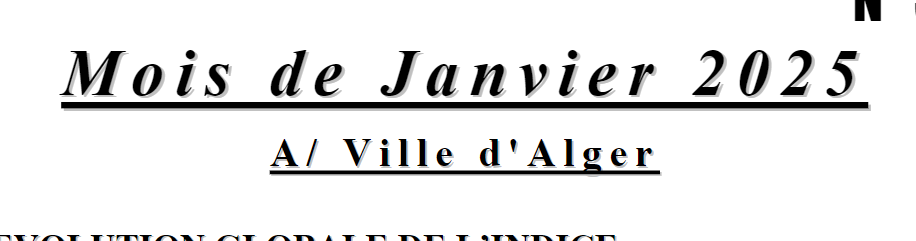

the potatoes price 

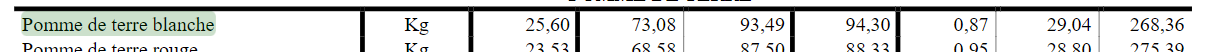



In [21]:
for i in range(20,214):

        # Convert PDF pages to images
        pages = pdf2image.convert_from_path("pdf_files/" + str(i) + '.pdf', 300)

        data = {'year':-1,'month':'', 'price':0.0}
        all_pdf_data = []
        for page in pages:
                # Use OCR on each page
                text = pytesseract.image_to_string(page)
                lines = text.splitlines()
                selected_lines = [line for line in lines if ("Pomme de terre blanche" in line) or  ("Mois d" in line)]
                all_pdf_data.append(selected_lines)
                
        print("selected_lines:\t",all_pdf_data)
        date = next((item for item in all_pdf_data if item and "Mois d" in item[0]), None)

    
        
        if date != None:
            date = str(date)
            print("date extracted successfully:\t",date)
            dates = re.split(r"[ '\"’]", date)            
            data["year"] =dates[4]
            data["month"] = dates[3]
        else:
              print("none")
        price = next((item for item in all_pdf_data if item and "Pomme de terre blanche" in item[0]), None)
        if price != None:
            price = str(price)
            print("price extracted successfully!\t",price)
            prices = price.split('blanche')[1]
            prices = price.split(' ')
            if(len(prices) > 8):
                data["price"] = prices[8]
            else:
                data['price'] = prices[-1]
            data['price'] = data['price'].replace(',', '.')
        else:
              print("none")

        
    
        data = [data]
        with open('testOCR.csv', 'a', newline='') as csvfile:
                fieldnames = ['year', 'month', 'price']
                writer = csv.DictWriter(csvfile, fieldnames=fieldnames)
                writer.writerows(data)


selected_lines:	 [['Mois de Juillet 2012'], [], [], [], [], ['Pomme de terre blanche Kg 24,10 36,55 39,62 40,77 2,90 11,55 69,17'], [], []]
date extracted successfully:	 ['Mois de Juillet 2012']
price extracted successfully!	 ['Pomme de terre blanche Kg 24,10 36,55 39,62 40,77 2,90 11,55 69,17']
selected_lines:	 [['Mois de Juin 2023'], [], [], [], [], ['Pomme de terre blanche Kg 21,09 77,19 65,90'], [], []]
date extracted successfully:	 ['Mois de Juin 2023']
price extracted successfully!	 ['Pomme de terre blanche Kg 21,09 77,19 65,90']
selected_lines:	 [['Mois de Février 2016'], [], [], [], [], ['Pomme de terre blanche Kg 27,24 80,81 45,03 42,11 -6,48 -47,89 54,59'], [], []]
date extracted successfully:	 ['Mois de Février 2016']
price extracted successfully!	 ['Pomme de terre blanche Kg 27,24 80,81 45,03 42,11 -6,48 -47,89 54,59']
selected_lines:	 [['Mois de Janvier 2022'], [], [], [], [], ['Pomme de terre blanche Kg 25,60 50,11 75,34 71,91 -4,55 43,50 180,90'], [], []]
date extracted 